**INTRODUCCION ANALISIS EXPLORATORIO DE DATOS**

El 15 de Abril de 1912 el Titanic se hundio luego de chocar con un Iceberg.

Murieron 1502 de los 2224 pasajeros y tripulantes.



**PassengerId:** Es el id del pasajero

**Survived:** Es la variable target que intentamos predecir(0 or 1)

1 = Sobrevivio 0 = No Sobrevivio

**Pclass: (Passenger Class)** es la clase socio-economica del pasajero y corresponde a una caracteristica ordinal categorica con solo 3 valores (1, 2 or 3):

1 = Clase Alta

2 = Clase Media

3 = Clase Baja

**Name, Sex and Age:** significado obvio

**SibSp:** Hermanos y esposa

**Parch:** Padres e hijos

**Ticket:** Numero de ticket del pasajero

**Fare:** Tarifa del pasaje

**Cabin:** numero de cabina del pasajero

**Embarked:** puerto de embarque es una caracteristica categorica con 3 unicos valores (C, Q or S):

C = Cherbourg Q = Queenstown S = Southampton

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')
SEED = 42

In [28]:
df_train = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')
df = pd.concat([df_train,df_test],sort=True).reset_index(drop=True)

In [29]:
df_train.name = 'Conjunto de entrenamiento'
df_test.name = 'Conjunto de prueba'
df.name = 'Conjunto Total' 

**¿Cual es nuestro target?**

Quienes sobrevivieron y cual fue la razon de que sobrevivan. Como influyeron las diversas variables para la supervivencia de una persona.

In [30]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

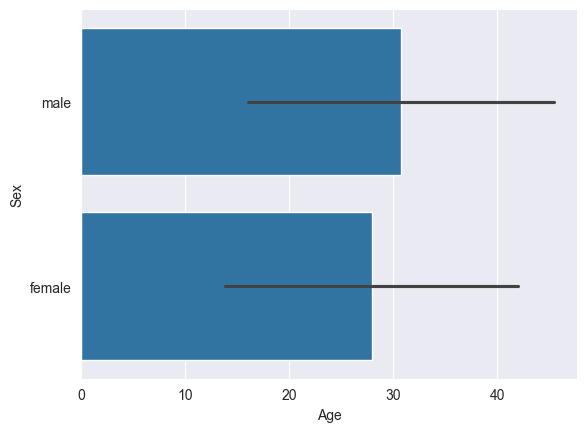

In [32]:
sns.barplot(x=df_train['Age'], y=df_train['Sex'], ci = 'sd') # intervalo de confianza puede ser None o un flotante
plt.show()

In [33]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0, 0.5, 'Cantidad de Pasajeros')

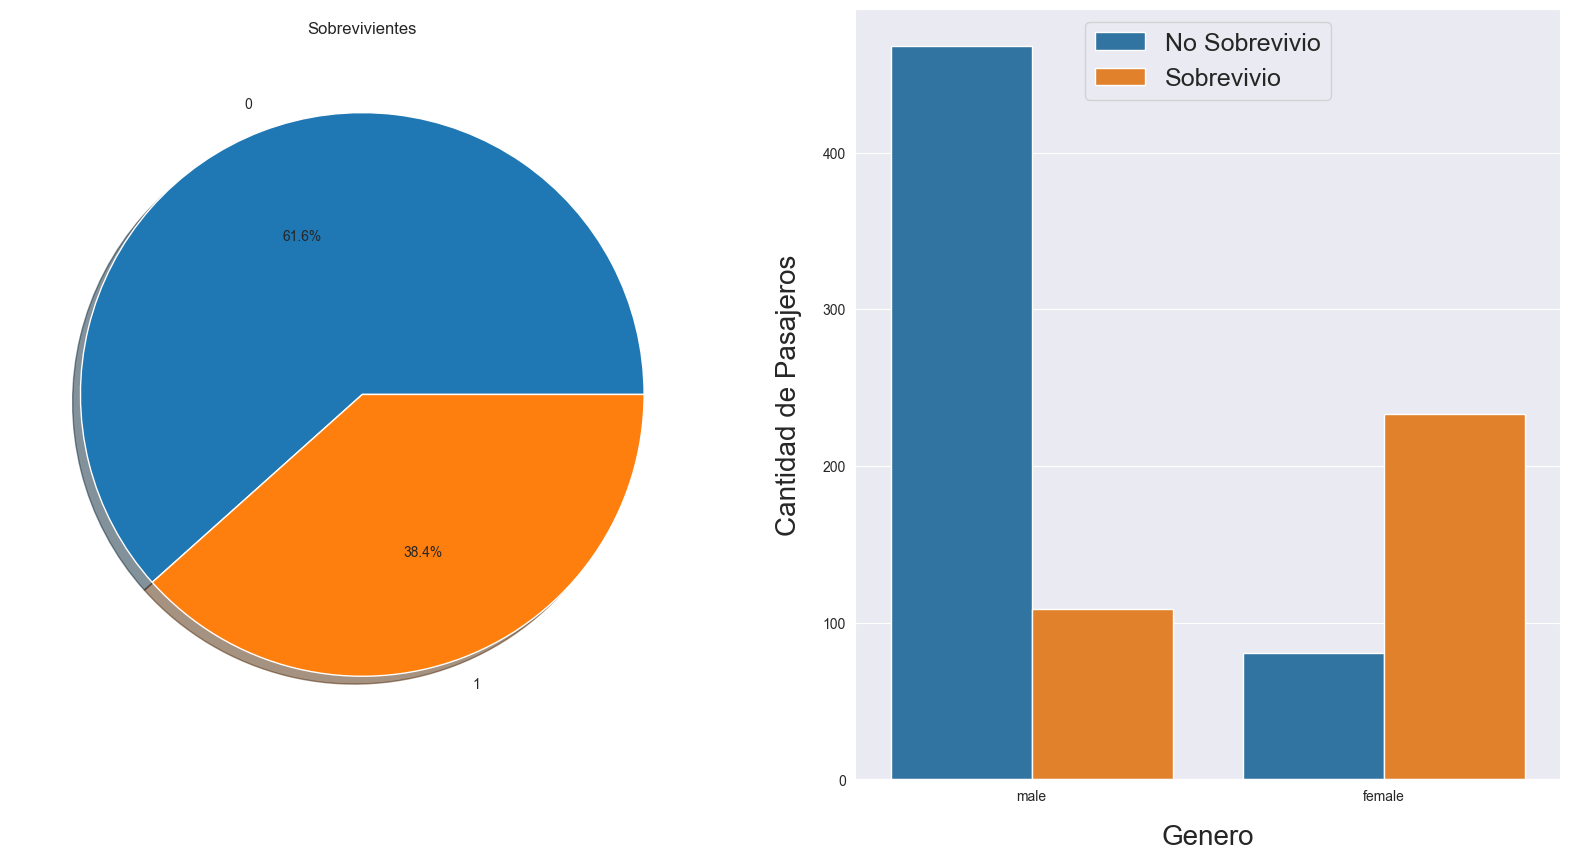

In [34]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10)) #En una fila dos graficos
df_train['Survived'] .value_counts()
df_train['Survived'] .value_counts().plot.pie(autopct = '%1.1f%%', ax =axs[0], shadow = True)

axs[0].set_title('Sobrevivientes')
axs[0].set_ylabel('')

#sns.countplot('Sex', hue = 'Survived', data = df_train, ax = axs[1])
sns.countplot(x='Sex', hue='Survived', data=df_train, ax = axs[1]) #Se agrupa por Survived
plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper center', prop={'size': 18})
plt.xlabel('Genero', size=20, labelpad=15)
plt.ylabel('Cantidad de Pasajeros', size=20, labelpad=15)

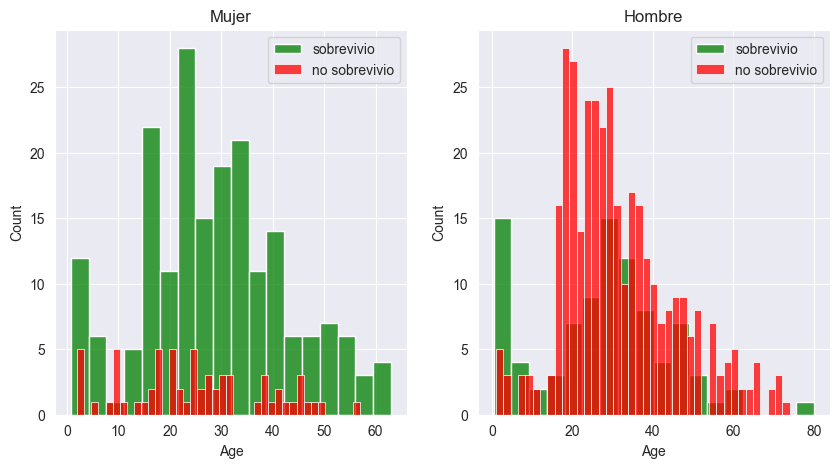

In [35]:
sobrevivio = 'sobrevivio'
no_sobrevivio = 'no sobrevivio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 5)) #En una fila dos graficos
mujeres = df_train[df_train['Sex'] == 'female']
hombres = df_train[df_train['Sex'] == 'male']

ax = sns.histplot(mujeres[mujeres['Survived'] == 1].Age.dropna(), bins=18, label=sobrevivio, color='green', ax=axes[0], kde=False)
ax = sns.histplot(mujeres[mujeres['Survived'] == 0].Age.dropna(), bins=40, label=no_sobrevivio, color='red', ax=axes[0], kde=False)
ax.legend()
ax.set_title('Mujer')

ax = sns.histplot(hombres[hombres['Survived'] == 1].Age.dropna(), bins=18, label=sobrevivio, color='green', ax=axes[1], kde=False)
ax = sns.histplot(hombres[hombres['Survived'] == 0].Age.dropna(), bins=40, label=no_sobrevivio, color='red', ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Hombre')


**I ANALISIS DE VARIABLES O CARACTERISTICAS:**

Analizemos las caracteristicas de algunas variables, identifiquemos su tipo y su impacto en la supervicencia. 

Variable categorica: Sexo o Genero (Sex)

Variable ordinal: Clase (Pclass)

Variable continua: Edad (Age)


**SEX**

In [36]:
df['PassengerId'].count()

np.int64(1309)

In [37]:
df_train['PassengerId'].count()

np.int64(891)

In [38]:
df_test['PassengerId'].count()

np.int64(418)

In [39]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [40]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

        Survived
Sex             
female  0.742038
male    0.188908


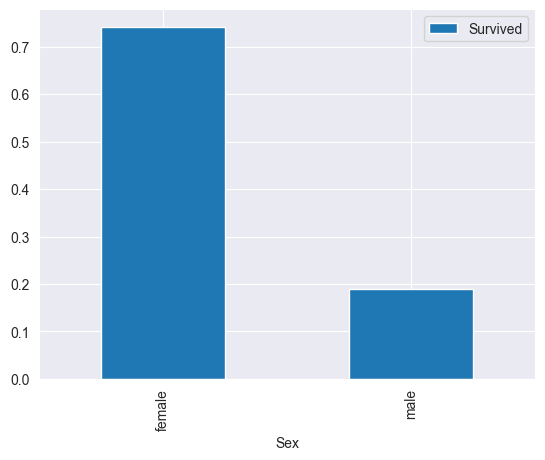

In [41]:
#Promedio de hombres y mujeres sobrevivientes
#Observemos que Sex aun la manejamos como variable categorica
print(df[['Sex','Survived']].groupby('Sex').mean())
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

**PCLASS**

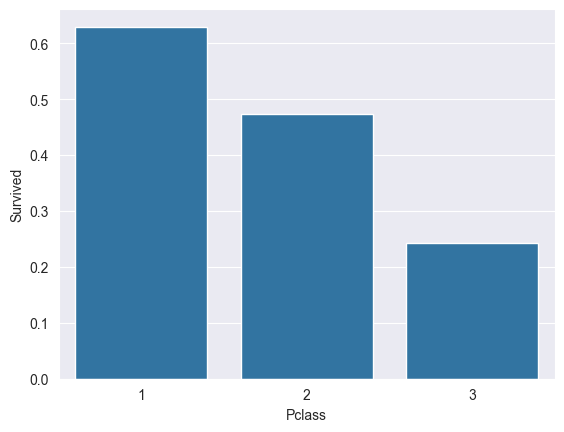

In [42]:
sns.barplot(data=df, x='Pclass', y='Survived', ci = None)
plt.show()

**IMPACTO DEL SEXO Y LA CLASE:**

**EDAD**

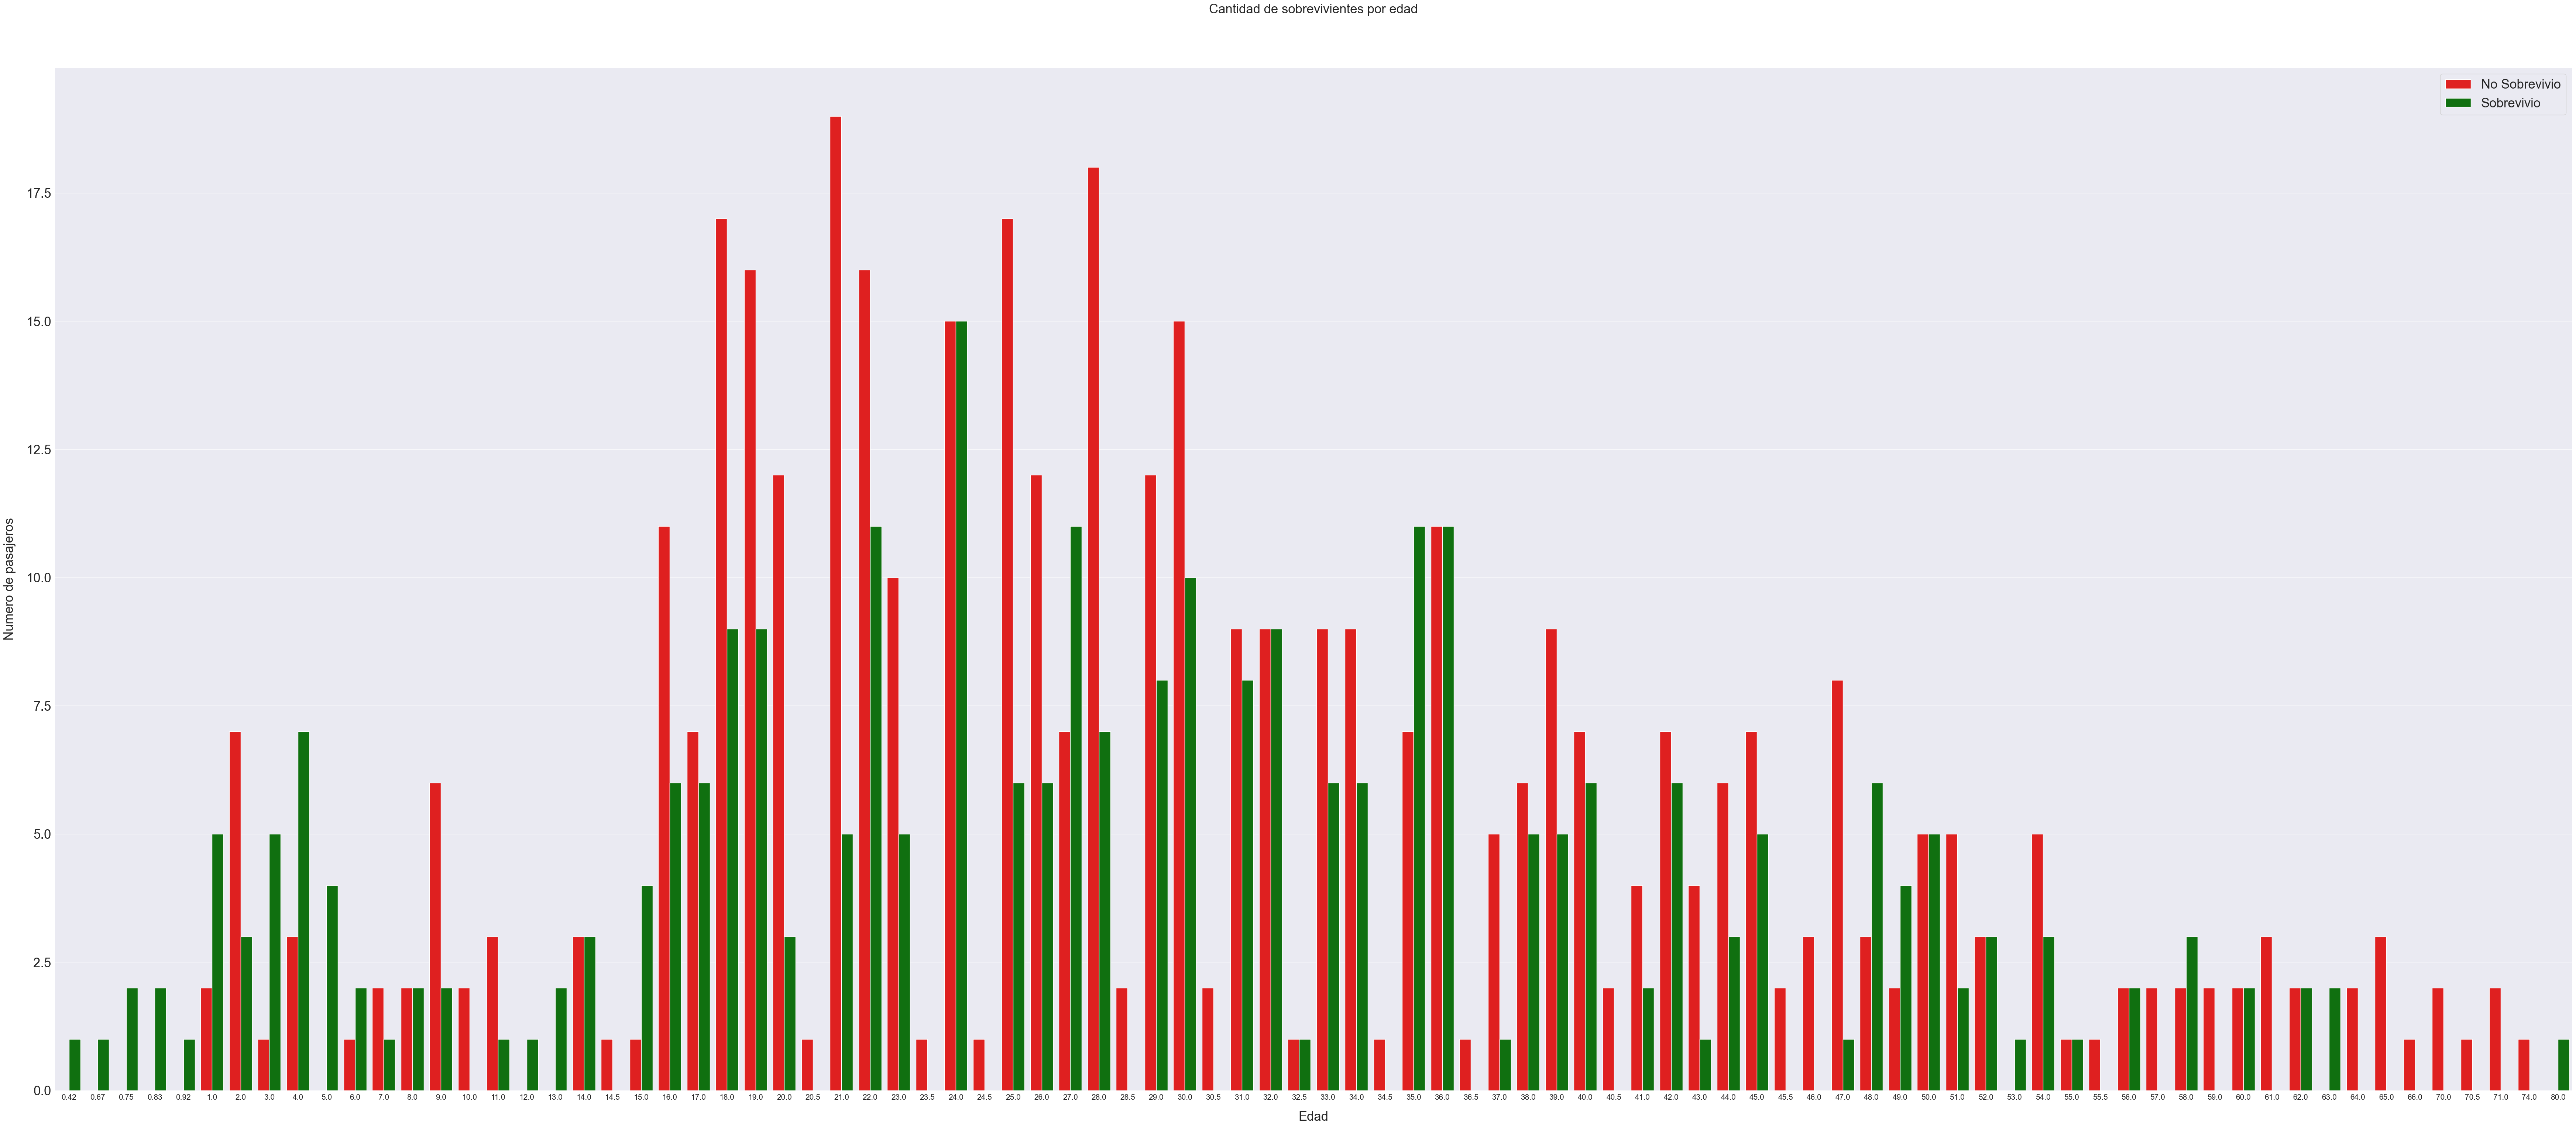

In [45]:
fig, axs = plt.subplots(figsize=(88, 36))

sns.countplot(x='Age', hue='Survived', data=df_train, palette=['red',"green"])

plt.xlabel('Edad', size=25, labelpad=20)
plt.ylabel('Numero de pasajeros', size=25, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=25)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 25})
plt.title('Cantidad de sobrevivientes por edad', size=25, y=1.05)

plt.show()

In [46]:
#df.loc[df['Age'] <= 15, 'Age']

In [47]:
df['age_cat'] = 0
df.loc[df['Age'] <= 15, 'age_cat'] = 0
df.loc[(df['Age'] > 15) & (df['Age'] <= 30), 'age_cat'] = 1
df.loc[(df['Age'] > 30) & (df['Age'] <= 45), 'age_cat'] = 2
df.loc[(df['Age'] > 45) & (df['Age'] <= 60), 'age_cat'] = 3
df.loc[(df['Age'] > 60) & (df['Age'] <= 75), 'age_cat'] = 4
df.loc[df['Age'] > 75, 'age_cat'] = 5

df_train['age_cat'] = 0
df_train.loc[df_train['Age'] <= 15, 'age_cat'] = 0
df_train.loc[(df_train['Age'] > 15) & (df_train['Age'] <= 30), 'age_cat'] = 1
df_train.loc[(df_train['Age'] > 30) & (df_train['Age'] <= 45), 'age_cat'] = 2
df_train.loc[(df_train['Age'] > 45) & (df_train['Age'] <= 60), 'age_cat'] = 3
df_train.loc[(df_train['Age'] > 60) & (df_train['Age'] <= 75), 'age_cat'] = 4
df_train.loc[df_train['Age'] > 75, 'age_cat'] = 5

df.head(10)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,3
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,0


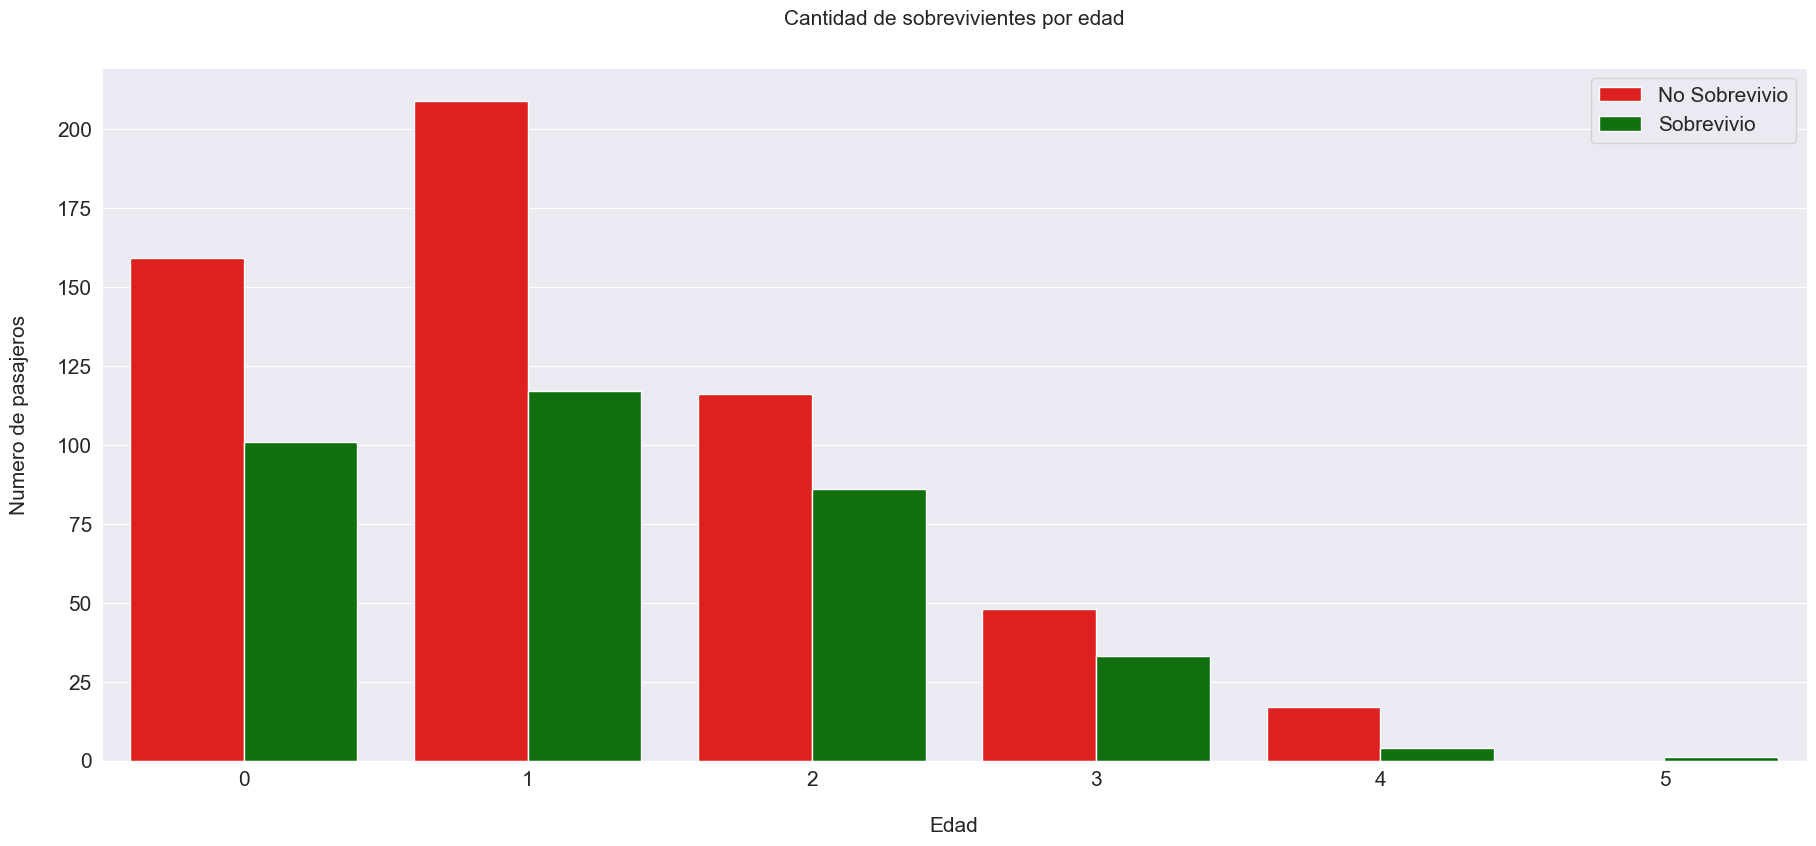

In [50]:
fig, axs = plt.subplots(figsize=(22, 9))

#sns.countplot(x='Age', hue='Survived', data=df, palette=['red',"green"])
sns.countplot(x='age_cat', hue='Survived', data=df_train, palette=['red',"green"])

plt.xlabel('Edad', size=15, labelpad=20)
plt.ylabel('Numero de pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Cantidad de sobrevivientes por edad', size=15, y=1.05)

plt.show()

In [54]:
df['fare_cat'] = 0
df.loc[df['Fare'] <= 7.229, 'fare_cat'] = 0
df.loc[(df['Fare'] > 7.229) & (df['Fare'] <= 7.75), 'fare_cat'] = 1
df.loc[(df['Fare'] > 7.75) & (df['Fare'] <= 7.896), 'fare_cat'] = 2
df.loc[(df['Fare'] > 7.896) & (df['Fare'] <= 8.05), 'fare_cat'] = 3
df.loc[(df['Fare'] > 8.05) & (df['Fare'] <= 10.5), 'fare_cat'] = 4
df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 13.0), 'fare_cat'] = 5
df.loc[(df['Fare'] > 13.0) & (df['Fare'] <= 15.85), 'fare_cat'] = 6
df.loc[(df['Fare'] > 15.85) & (df['Fare'] <= 24.0), 'fare_cat'] = 7
df.loc[(df['Fare'] > 24.0) & (df['Fare'] <=  26.55), 'fare_cat'] = 8
df.loc[(df['Fare'] > 26.55) & (df['Fare'] <= 33.308), 'fare_cat'] = 9
df.loc[(df['Fare'] > 33.308) & (df['Fare'] <= 55.9), 'fare_cat'] = 10
df.loc[(df['Fare'] > 55.9) & (df['Fare'] <= 83.158), 'fare_cat'] = 11
df.loc[(df['Fare'] > 83.158) & (df['Fare'] <= 512.329), 'fare_cat'] = 12


#df.head(10)

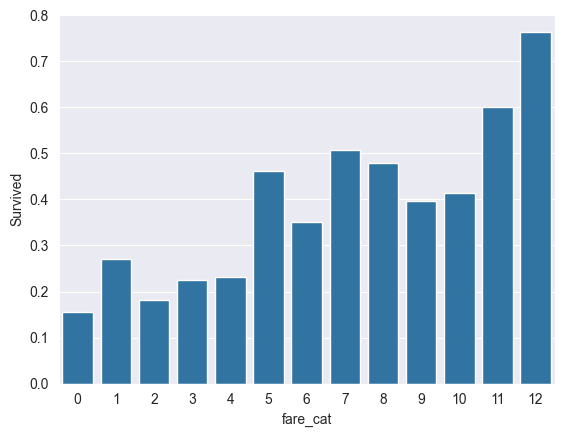

In [55]:
sns.barplot(data=df, x='fare_cat', y='Survived', ci = None)
plt.show()

In [56]:
tar12 = df.loc[df['fare_cat'] == 12]
tar12 = tar12[['Fare', 'fare_cat','Survived']]
print(tar12)

          Fare  fare_cat  Survived
27    263.0000        12       0.0
31    146.5208        12       1.0
62     83.4750        12       0.0
88    263.0000        12       1.0
118   247.5208        12       0.0
...        ...       ...       ...
1281   93.5000        12       NaN
1291  164.8667        12       NaN
1298  211.5000        12       NaN
1302   90.0000        12       NaN
1305  108.9000        12       NaN

[104 rows x 3 columns]


In [57]:
tar12.describe()

,Fare,fare_cat,Survived
count,104.000000,104.0,68.000000
mean,157.004686,12.0,0.764706
std,61.876426,0.0,0.427336
min,83.158300,12.0,0.000000
25%,106.425000,12.0,1.000000
50%,136.206250,12.0,1.000000
75%,211.500000,12.0,1.000000
max,263.000000,12.0,1.000000


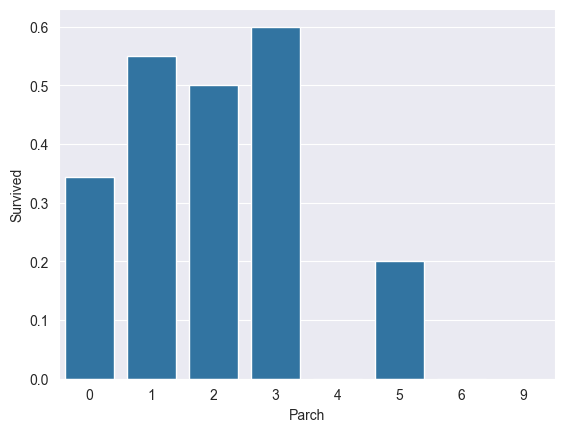

In [58]:
sns.barplot(data=df, x='Parch', y='Survived', ci = None)
plt.show()

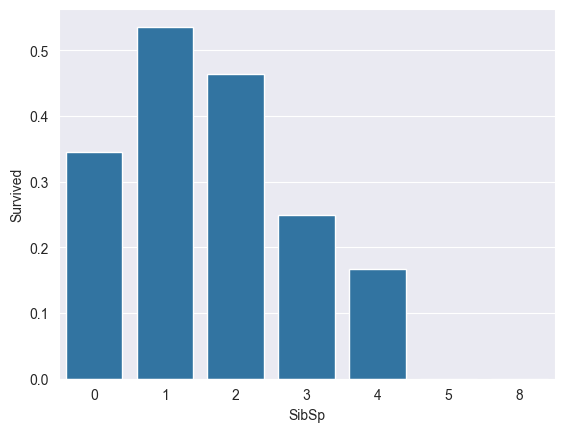

In [59]:
sns.barplot(data=df, x='SibSp', y='Survived', ci = None)
plt.show()

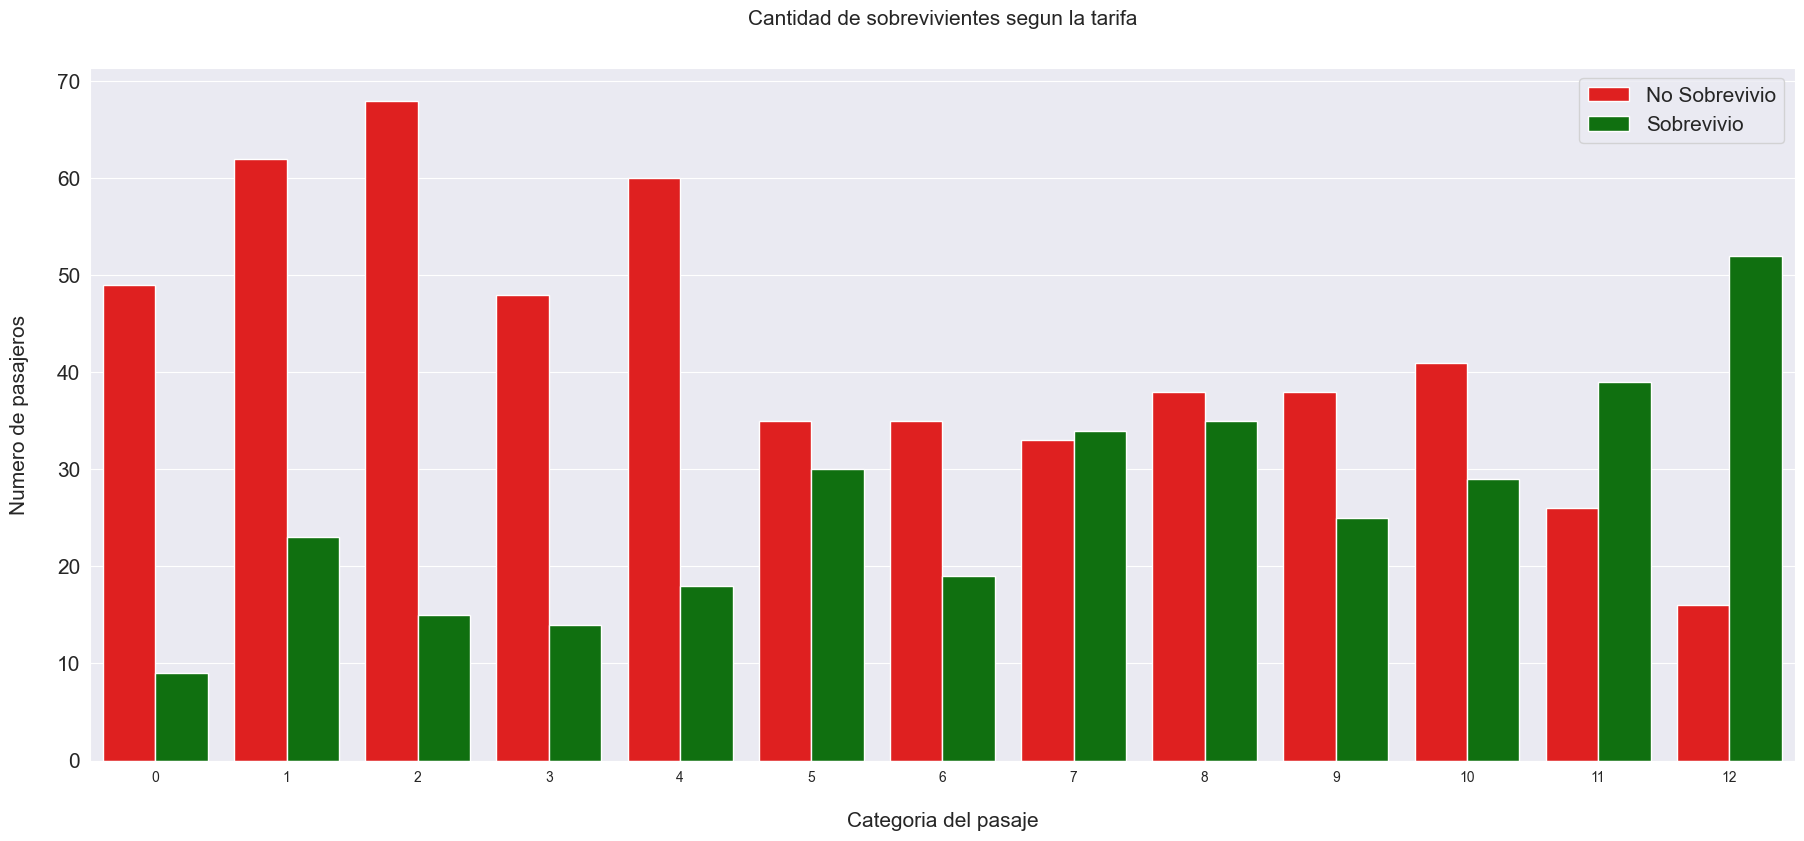

In [61]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='fare_cat', hue='Survived', data=df, palette=['red',"green"])

plt.xlabel('Categoria del pasaje', size=15, labelpad=20)
plt.ylabel('Numero de pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Cantidad de sobrevivientes segun la tarifa', size=15, y=1.05)

plt.show()

In [62]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,"(-0.001, 7.25]",1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,"(56.496, 83.475]",11
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,"(7.896, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,"(34.157, 56.496]",10
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,"(7.896, 8.05]",3


**II MISSING VALUES**

Es conveniente trabajar en conjuntos de prueba y entrenamiento concatenados mientras se trabaja con valores faltantes; de lo contrario, los datos completos pueden sobreajustarse a las muestras del conjunto de prueba o entrenamiento.

In [63]:
total_datos_perdidos = df_train.isnull().sum().sort_values(ascending=False)
#print(total_datos_perdidos)
porc_perdidos = (df_train.isnull().sum()/df_train.isnull().count())*100
#print(porc_perdidos)
round_porc_perdidos = (round(porc_perdidos, 2)).sort_values(ascending=False)
#print(round_porc_perdidos)
datos_perdidos = pd.concat([total_datos_perdidos, porc_perdidos], axis=1, keys=['Datos Perdidos','Porcentaje de Datos Perdidos'])
datos_perdidos.head()

,Datos Perdidos,Porcentaje de Datos Perdidos
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
PassengerId,0,0.000000


In [64]:
df_train.isnull().mean()  #Porque usamos mean?

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
age_cat        0.000000
dtype: float64

In [65]:
#print(df_train.info())
df_train.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,2
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,1
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,1
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S,3
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S,2
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,1
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,2
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S,1


In [66]:
df_test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [67]:
#print(df_test.info())
df_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S
257,1149,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S
172,1064,3,"Dyker, Mr. Adolf Fredrik",male,23.0,1,0,347072,13.9000,NaN,S
157,1049,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.4000,D28,S
158,1050,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S
237,1129,3,"Baccos, Mr. Raffull",male,20.0,0,0,2679,7.2250,NaN,C
32,924,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0,1,2,C.A. 2315,20.5750,NaN,S
222,1114,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.5000,F33,S
123,1015,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,NaN,S


**PUERTO DE EMBARQUE**

In [71]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,2,"(56.496, 83.475]",11
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,4,"(56.496, 83.475]",11


In [72]:
df['Embarked'] = df['Embarked'].fillna('S')

**FARE**

La tarifa está relacionada con el tamaño de la familia (Parch y SibSp) y las variable Pclass. El valor de la mediana para un hombre con un boleto de tercera clase y sin familia es una opción lógica para llenar el valor faltante.

In [73]:
print('Pasaje minimo: ', df['Fare'].min())
print('Pasaje maximo: ', df['Fare'].max())

Pasaje minimo:  0.0
Pasaje maximo:  512.3292


In [74]:
df[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,age_cat,fare_range,fare_cat
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,4,NaN,0


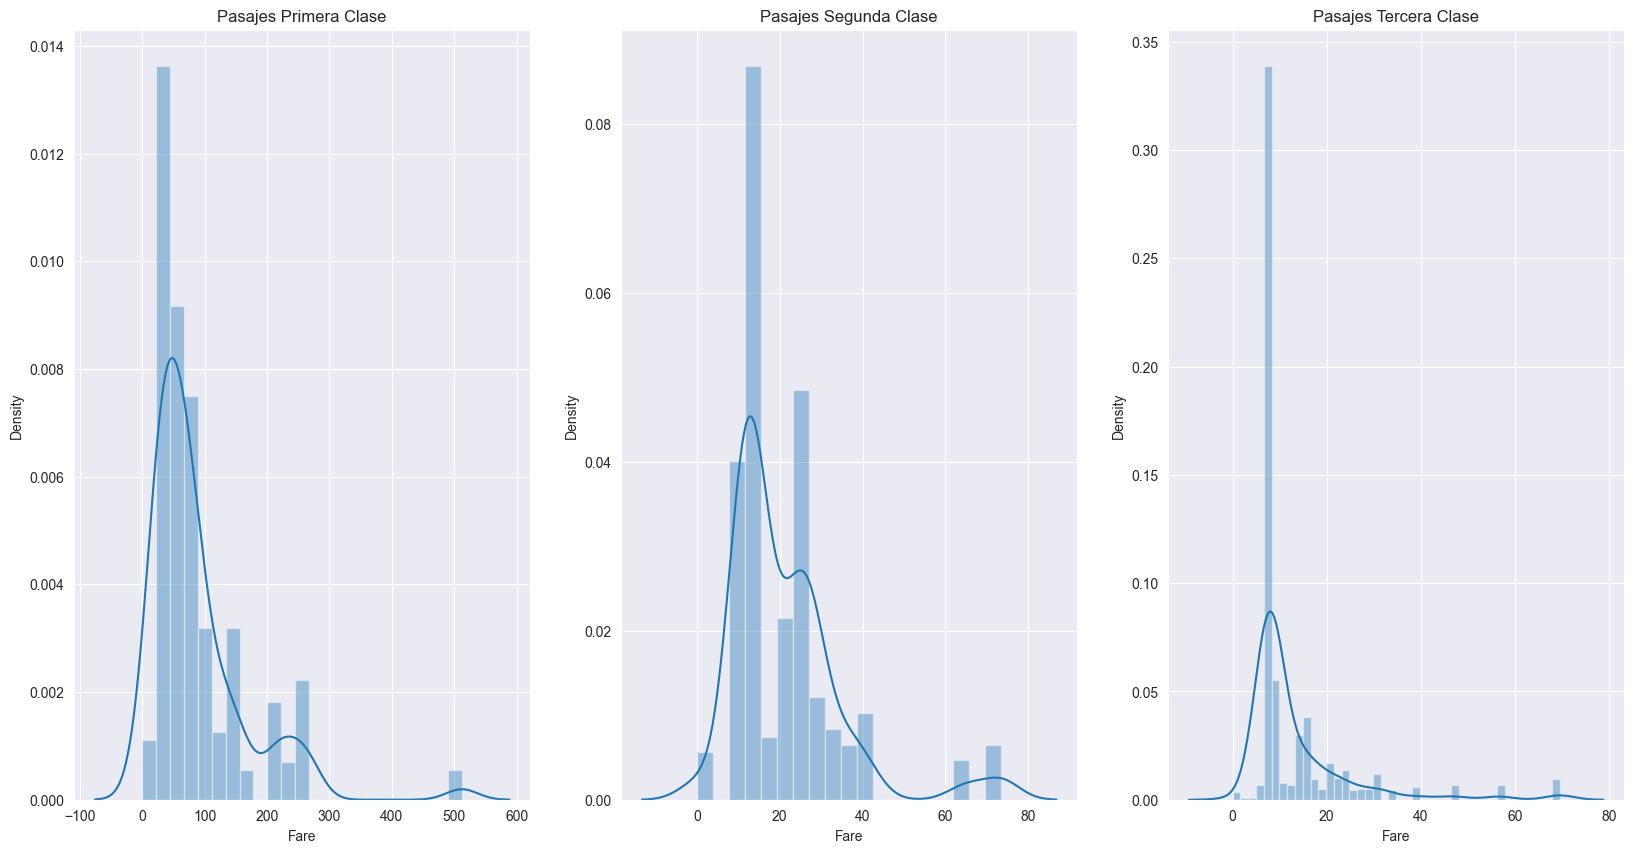

In [75]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10))
sns.distplot(df[df['Pclass'] == 1]['Fare'], ax = axs[0])
axs[0].set_title('Pasajes Primera Clase')
sns.distplot(df[df['Pclass'] == 2]['Fare'], ax = axs[1])
axs[1].set_title('Pasajes Segunda Clase')
sns.distplot(df[df['Pclass'] == 3]['Fare'], ax = axs[2])
axs[2].set_title('Pasajes Tercera Clase')
plt.show()

In [76]:
med_fare = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()
print(med_fare)
med_fare = med_fare[3][0][0]
print(med_fare)
# Llenamos el valor perdido con la mediana de la tarifa de un pasajero solo de tercera clase
df['Fare'] = df['Fare'].fillna(med_fare)
df['fare_cat'] = 2

df_train['Fare'] = df_train['Fare'].fillna(med_fare)
df_train['fare_cat'] = 2

df_test['Fare'] = df_test['Fare'].fillna(med_fare)
df_test['fare_cat'] = 2

Pclass  Parch  SibSp
1       0      0         31.33960
               1         75.25000
               2         51.47920
        1      0         63.35830
               1         83.15830
        2      0         83.15830
               1        120.00000
               2        262.37500
               3        263.00000
        3      1        262.37500
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         73.50000
               3         21.00000
        1      0         23.00000
               1         26.25000
               2         33.00000
        2      0         26.25000
               1         41.57920
        3      0         39.00000
               1         23.00000
               2         18.75000
3       0      0          7.85420
               1         14.45625
               2         19.83960
               3         16.92500
        1      0         12.47500
               1         15

Sexo y Embarque se deben pasar a numerico

In [77]:
df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

**Cabina**
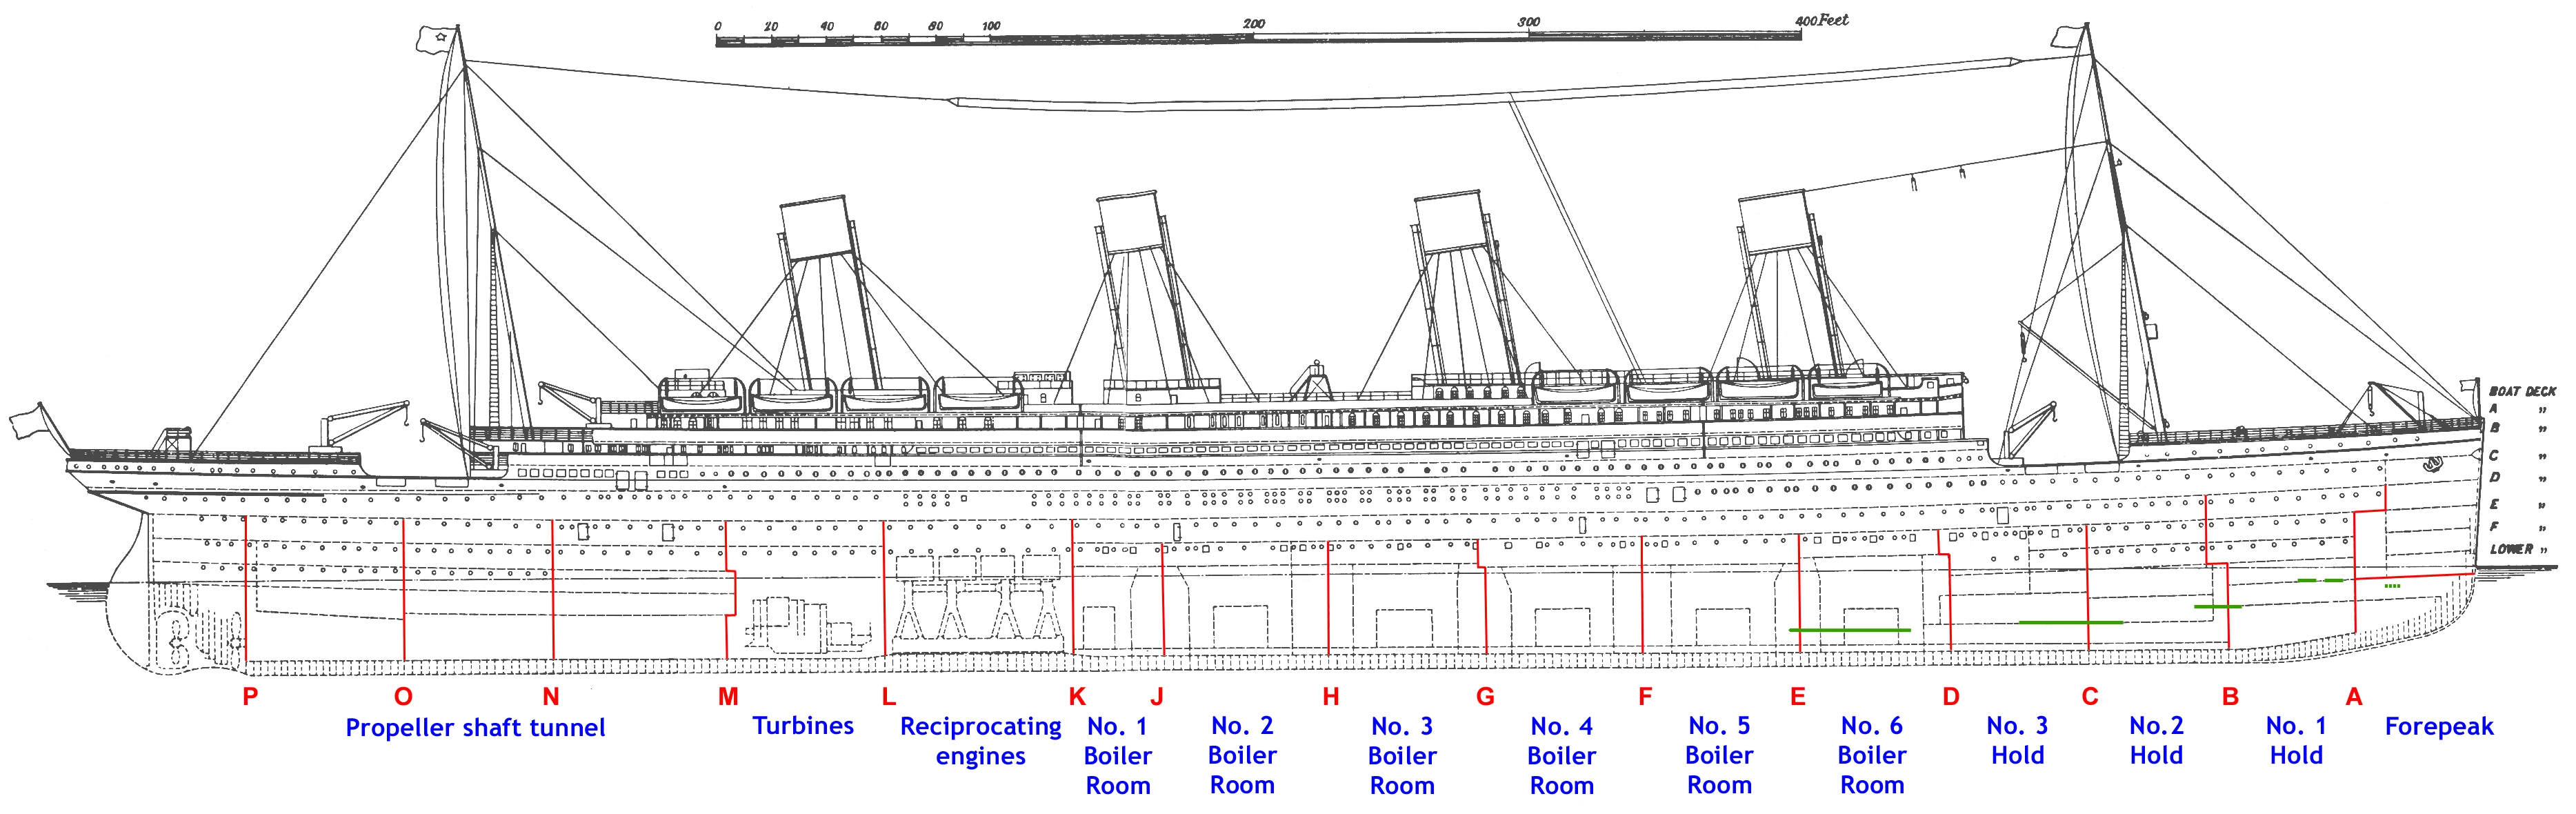

En la cubierta de botes había 6 habitaciones etiquetadas como T, U, W, X, Y, Z pero solo la cabina T está presente en el conjunto de datos.

Las cubiertas A, B y C eran solo para pasajeros de 1ra clase

Las cubiertas D y E eran para todas las clases.

Las cubiertas F y G eran para pasajeros de segunda y tercera clase.

Para ir de A a G, la distancia a la escalera aumenta, lo que podría ser un factor de supervivencia.

            0          1           2
A  100.000000   0.000000    0.000000
B  100.000000   0.000000    0.000000
C  100.000000   0.000000    0.000000
D   86.956522  13.043478    0.000000
E   82.926829   9.756098    7.317073
F    0.000000  61.904762   38.095238
G    0.000000   0.000000  100.000000
M    6.607495  25.049310   68.343195
T  100.000000   0.000000    0.000000


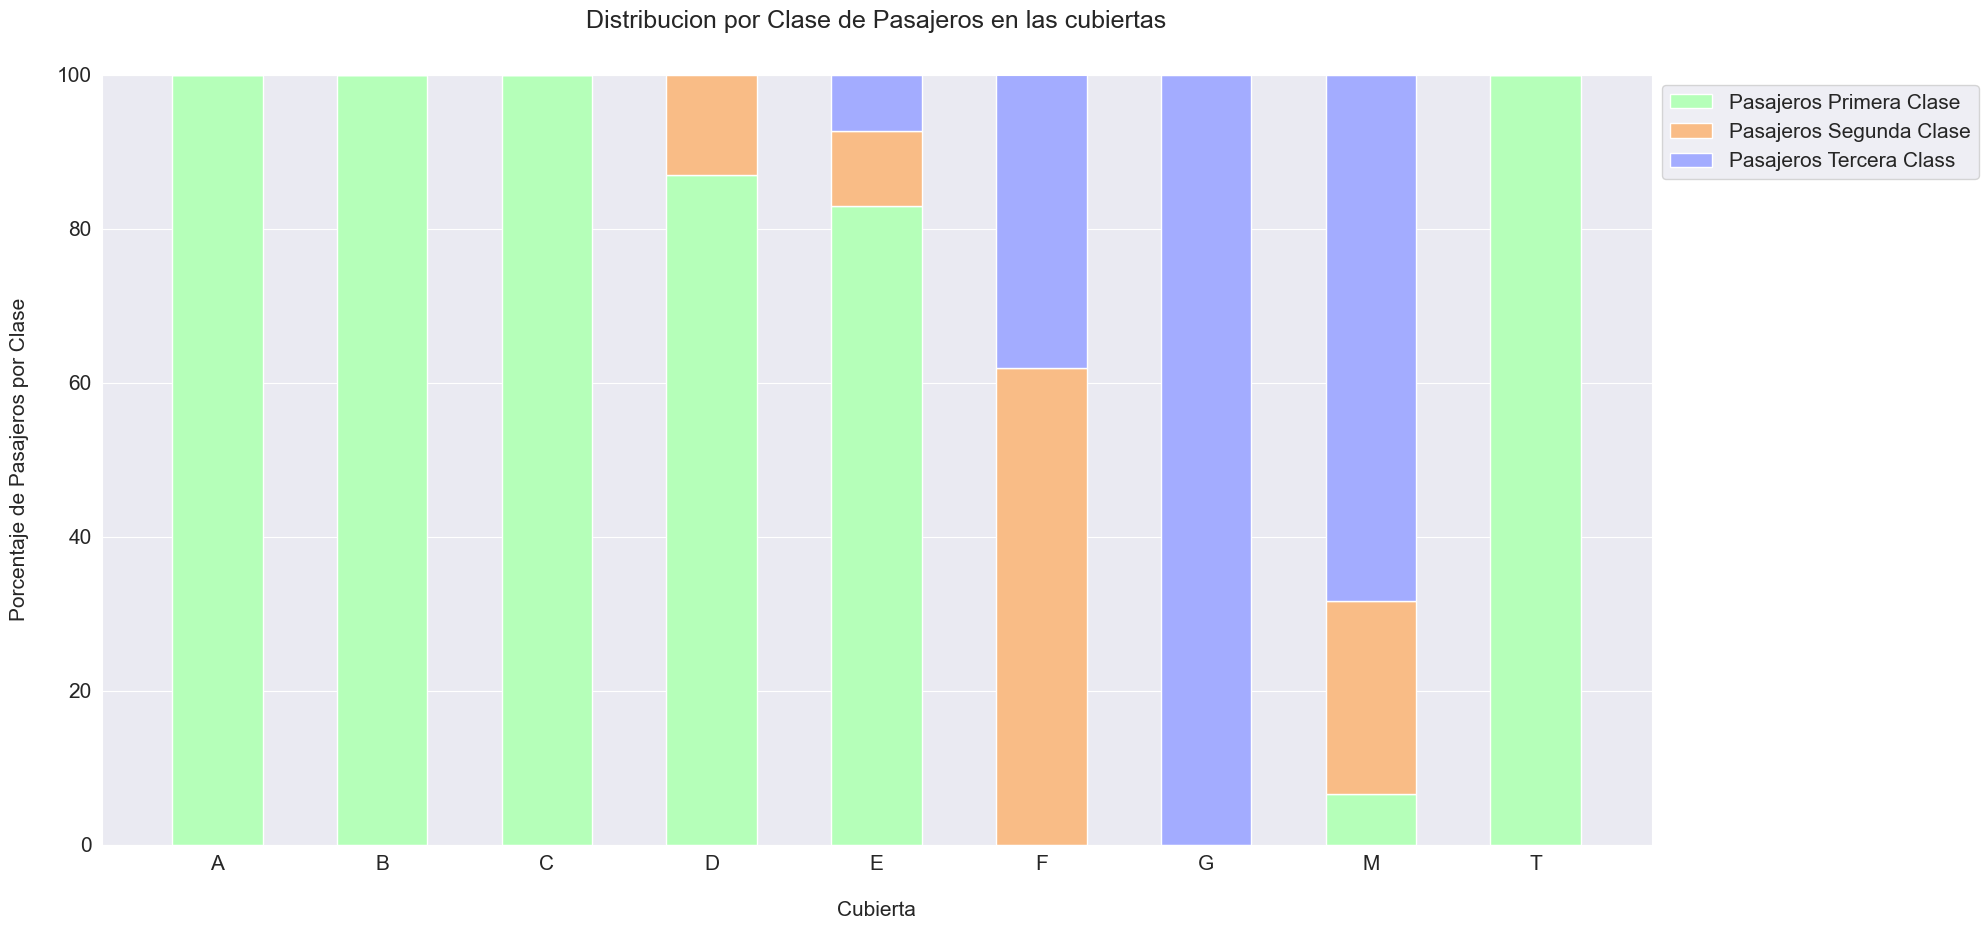

In [78]:
# Creamos el campo 'Cubierta/Deck'con la primera letra del campo 'Cabin' (M significa Missing)
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_decks = df.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
                                                                        
def get_pclass_dist(df):
    
    # Creamos un diccionario para el total de pasajeros por clase en cada cubierta
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)   
    deck_percentages = {}

    # Creamos un diccionario para el porcentaje de pasajeros por clase en cada cubierta
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    #print(percentages)
    df_percentages = pd.DataFrame(percentages).transpose()
    print(df_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.55
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Pasajeros Primera Clase')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Pasajeros Segunda Clase')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Pasajeros Tercera Class')

    plt.xlabel('Cubierta', size=15, labelpad=20)
    plt.ylabel('Porcentaje de Pasajeros por Clase', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Distribucion por Clase de Pasajeros en las cubiertas', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_decks)

display_pclass_dist(all_deck_per)

In [79]:
# Pasajero en la cubierta T se cambia a A
idx = df[df['Deck'] == 'T'].index
df.loc[idx, 'Deck'] = 'A'

           0          1
A  56.250000  43.750000
B  25.531915  74.468085
C  40.677966  59.322034
D  24.242424  75.757576
E  25.000000  75.000000
F  38.461538  61.538462
G  50.000000  50.000000
M  70.014556  29.985444


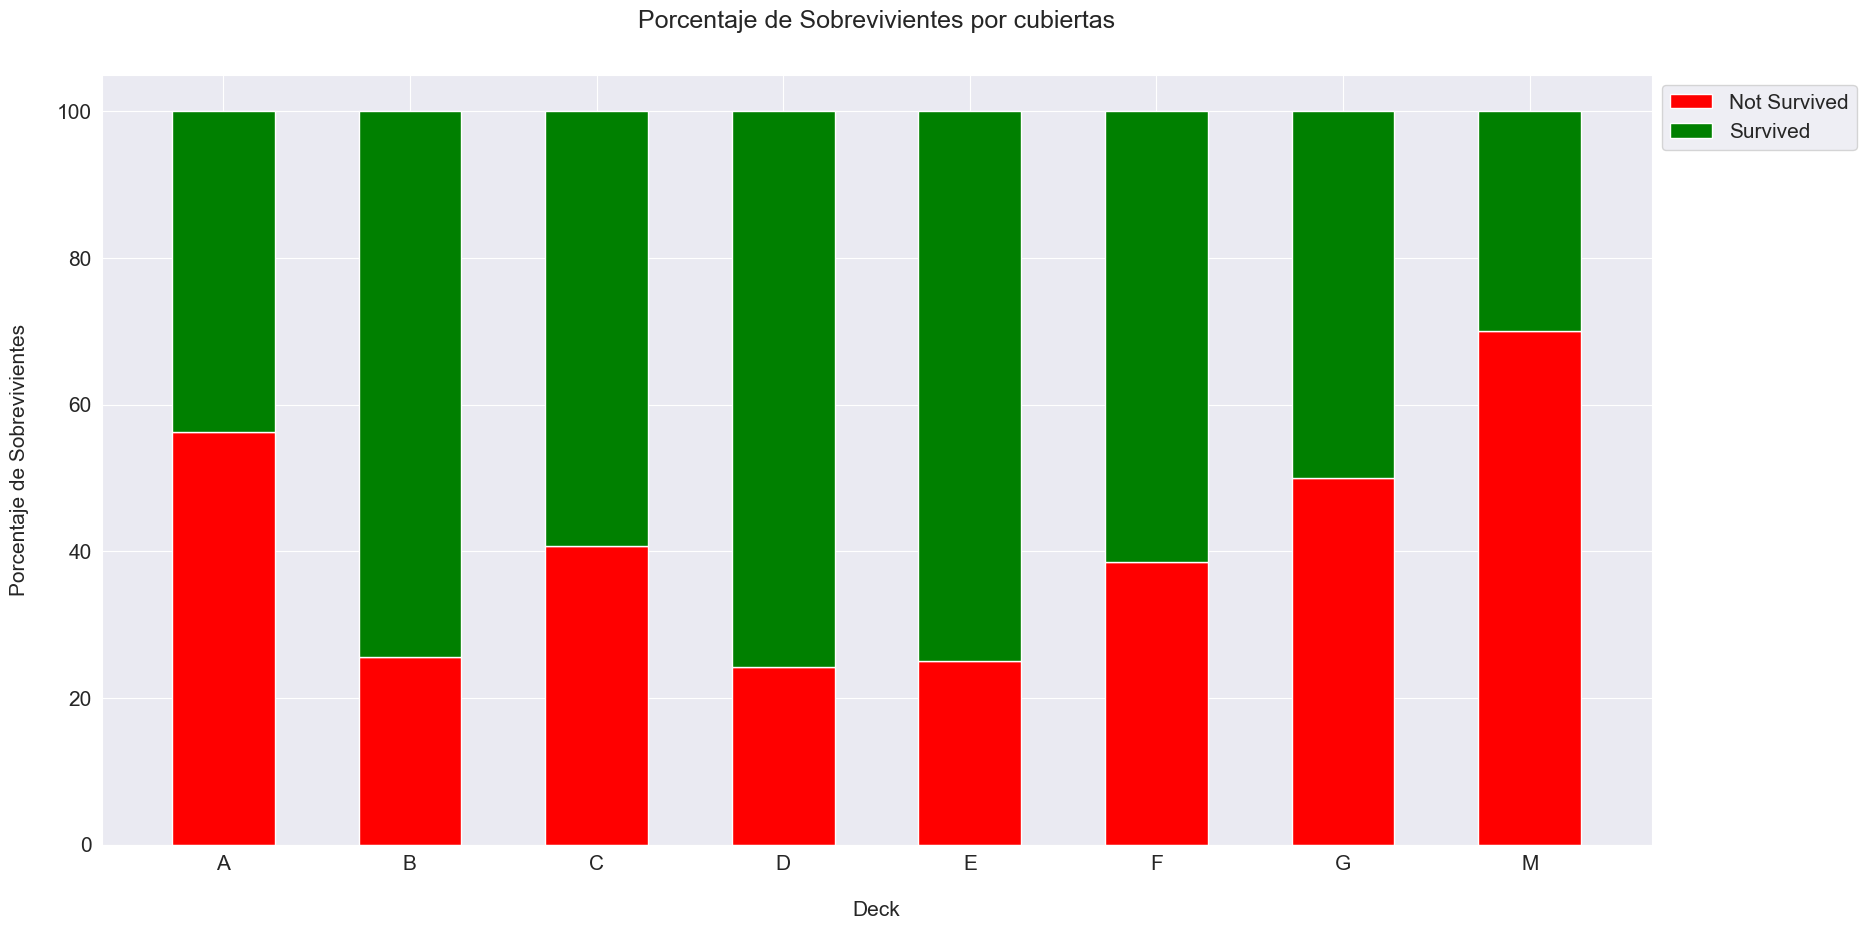

In [80]:
df_decks_survived = df.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creamos un diccionario para cada sobreviviente contado en cada cubierta
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    print(df_survived_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.55    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='red', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='green', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Porcentaje de Sobrevivientes', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Porcentaje de Sobrevivientes por cubiertas', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_decks_survived)
display_surv_dist(all_surv_per)

In [81]:
df['Deck'] = df['Deck'].replace(['A', 'B', 'C'], 'ABC')
df['Deck'] = df['Deck'].replace(['D', 'E'], 'DE')
df['Deck'] = df['Deck'].replace(['F', 'G'], 'FG')

df['Deck'].value_counts()


Deck
M      1014
ABC     182
DE       87
FG       26
Name: count, dtype: int64

**Correlaciones:**

Las características están altamente correlacionadas entre sí y dependen unas de otras. La correlación más alta entre características es 0.549500 en el conjunto de entrenamiento y 0.577147 en el conjunto de prueba (entre Tarifa y Pclass). Las otras características también están altamente correlacionadas. Hay 9 correlaciones en el conjunto de entrenamiento y 6 correlaciones en el conjunto de prueba que son superiores a 0,1.

**DISTRIBUCION VARIABLE OBJETIVO POR FEATURES:** 



CONTINUOS

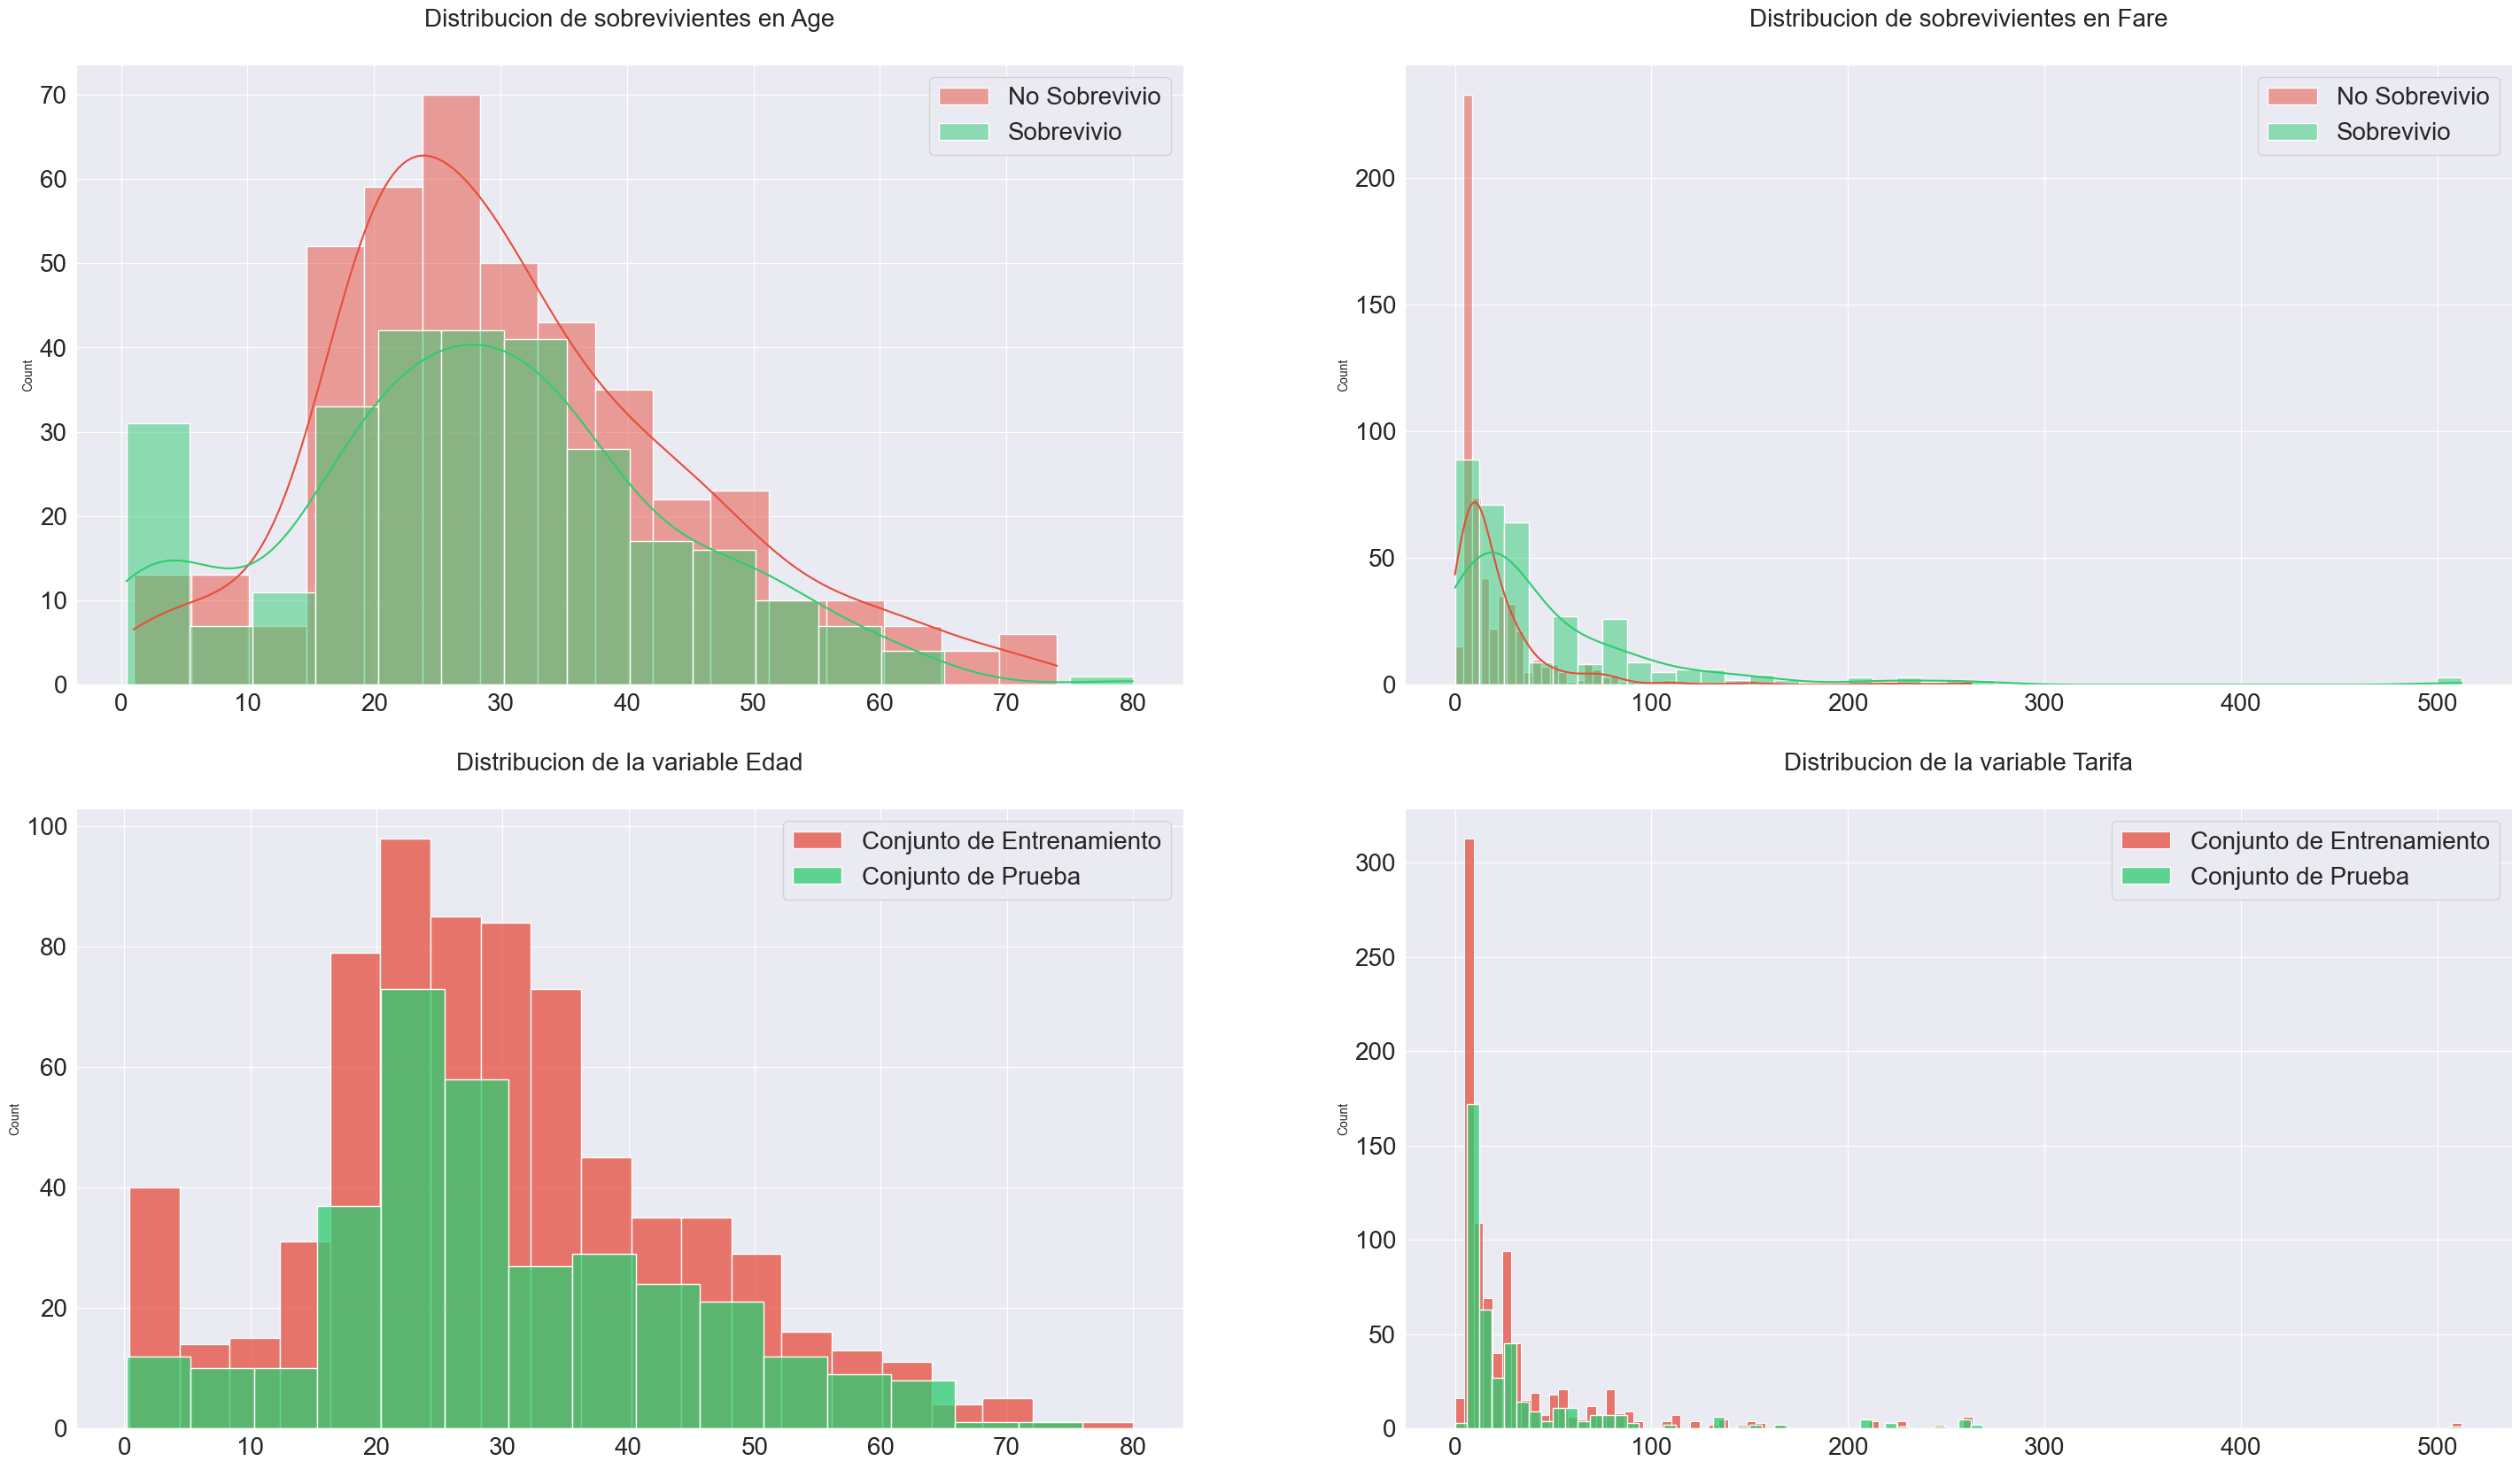

In [83]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.histplot(df_train[~surv][feature], label='No Sobrevivio', kde=True, color='#e74c3c', ax=axs[0][i])
    sns.histplot(df_train[surv][feature], label='Sobrevivio', kde=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.histplot(df_train[feature], label='Conjunto de Entrenamiento', kde=False, color='#e74c3c', ax=axs[1][i])
    sns.histplot(df_test[feature], label='Conjunto de Prueba', kde=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribucion de sobrevivientes en {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribucion de la variable {}'.format('Edad'), size=20, y=1.05)
axs[1][1].set_title('Distribucion de la variable {}'.format('Tarifa'), size=20, y=1.05)
        
plt.show()

**III FEATURE ENGINEERING**

En muchas actividades prácticas de ciencia de datos, el conjunto de datos contendrá variables categóricas. Estas variables normalmente se almacenan como valores de texto. Dado que el aprendizaje automático se basa en ecuaciones matemáticas, se generara un problema si mantenemos las variables categóricas como están. Muchos algoritmos admiten valores categóricos sin más manipulación, pero en esos casos, sigue siendo un tema de discusión sobre si codificar las variables o no. Los algoritmos que no soportan valores categóricos, en ese caso, utilizaran metodologías de codificación.

**Tarifa**

In [85]:
df['Fare'] = pd.qcut(df['Fare'], 13)

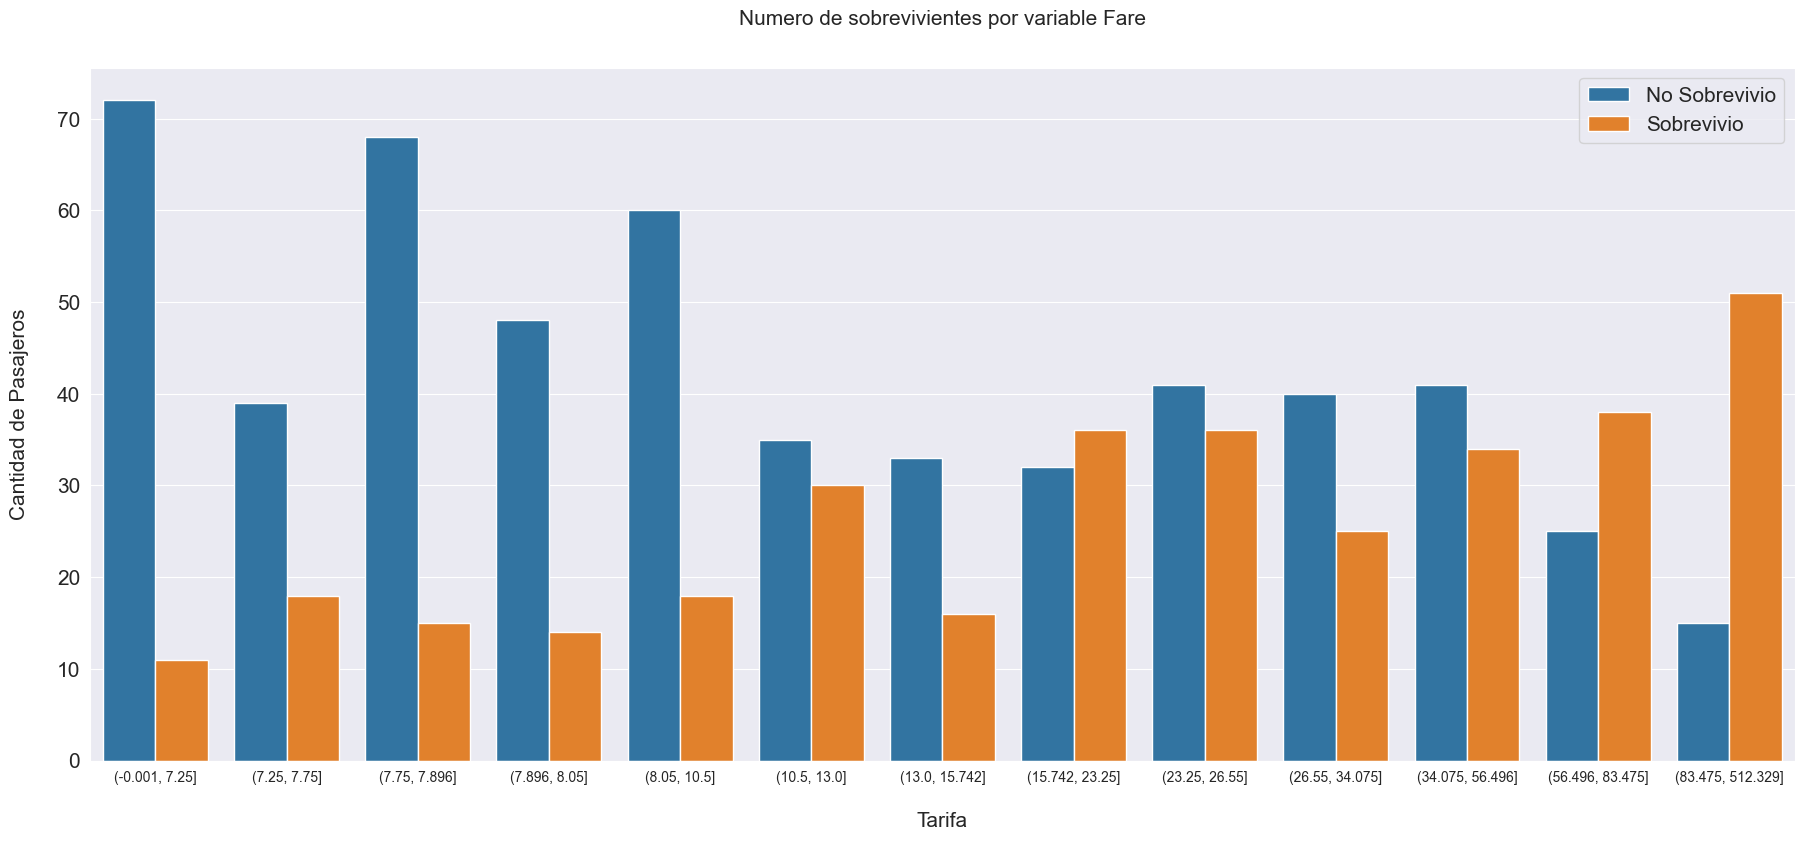

In [86]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)

plt.xlabel('Tarifa', size=15, labelpad=20)
plt.ylabel('Cantidad de Pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Numero de sobrevivientes por variable {}'.format('Fare'), size=15, y=1.05)

plt.show()

**Age**

In [87]:
df['Age'] = pd.qcut(df['Age'], 10)

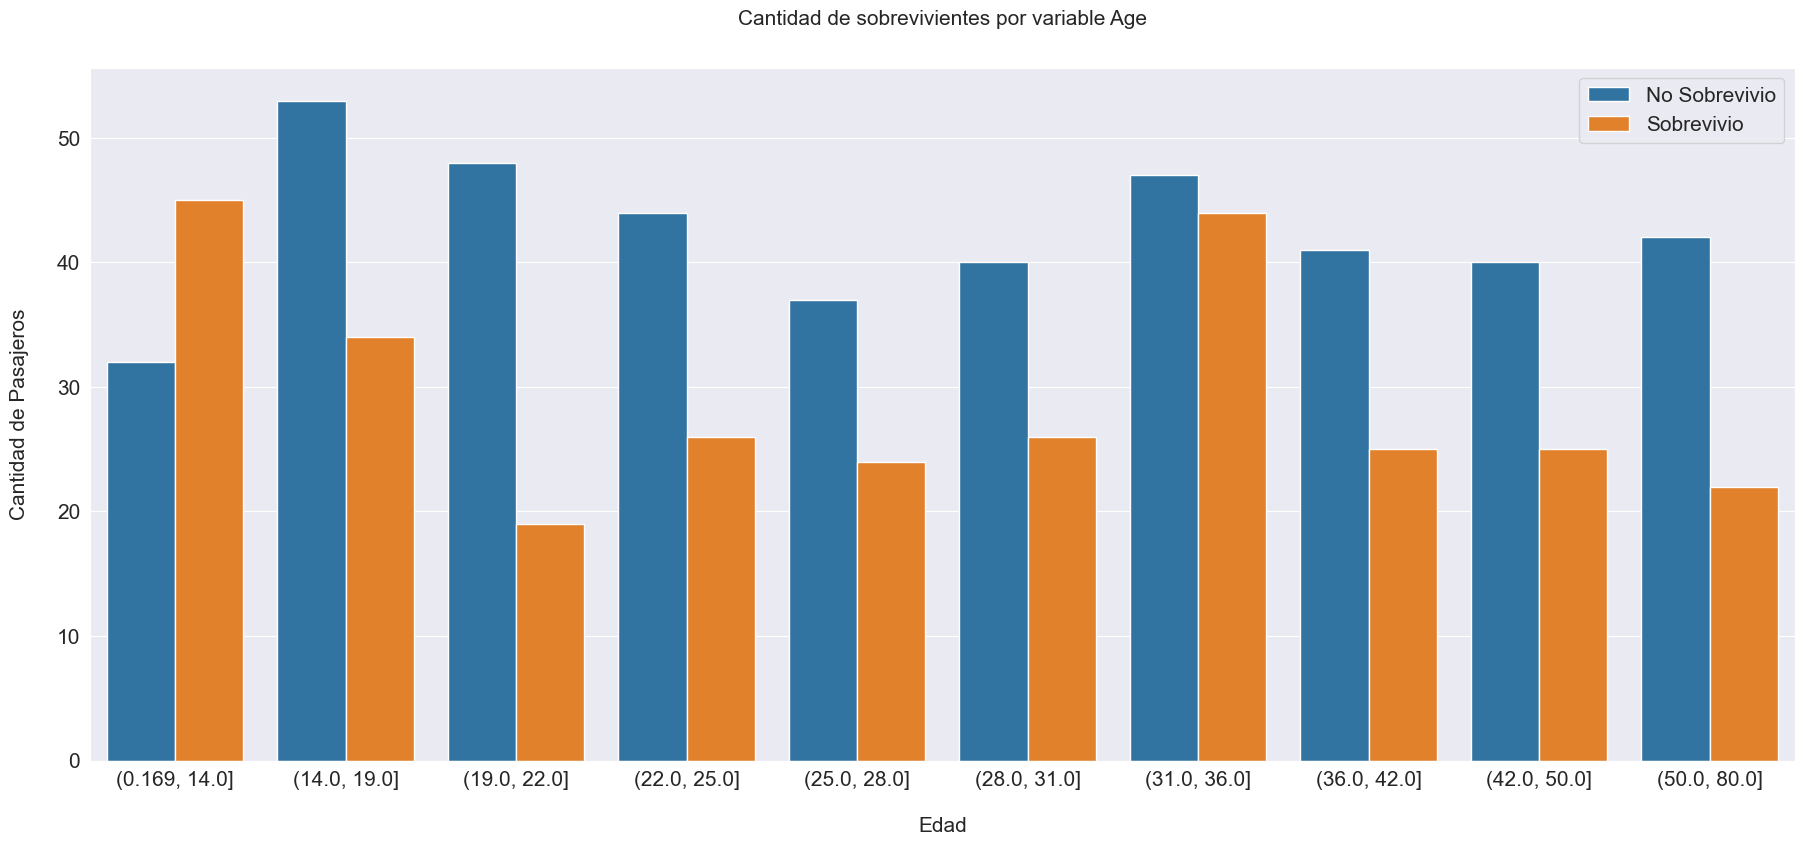

In [88]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df)

plt.xlabel('Edad', size=15, labelpad=20)
plt.ylabel('Cantidad de Pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Cantidad de sobrevivientes por variable {}'.format('Age'), size=15, y=1.05)

plt.show()

**Frecuency Encoding**

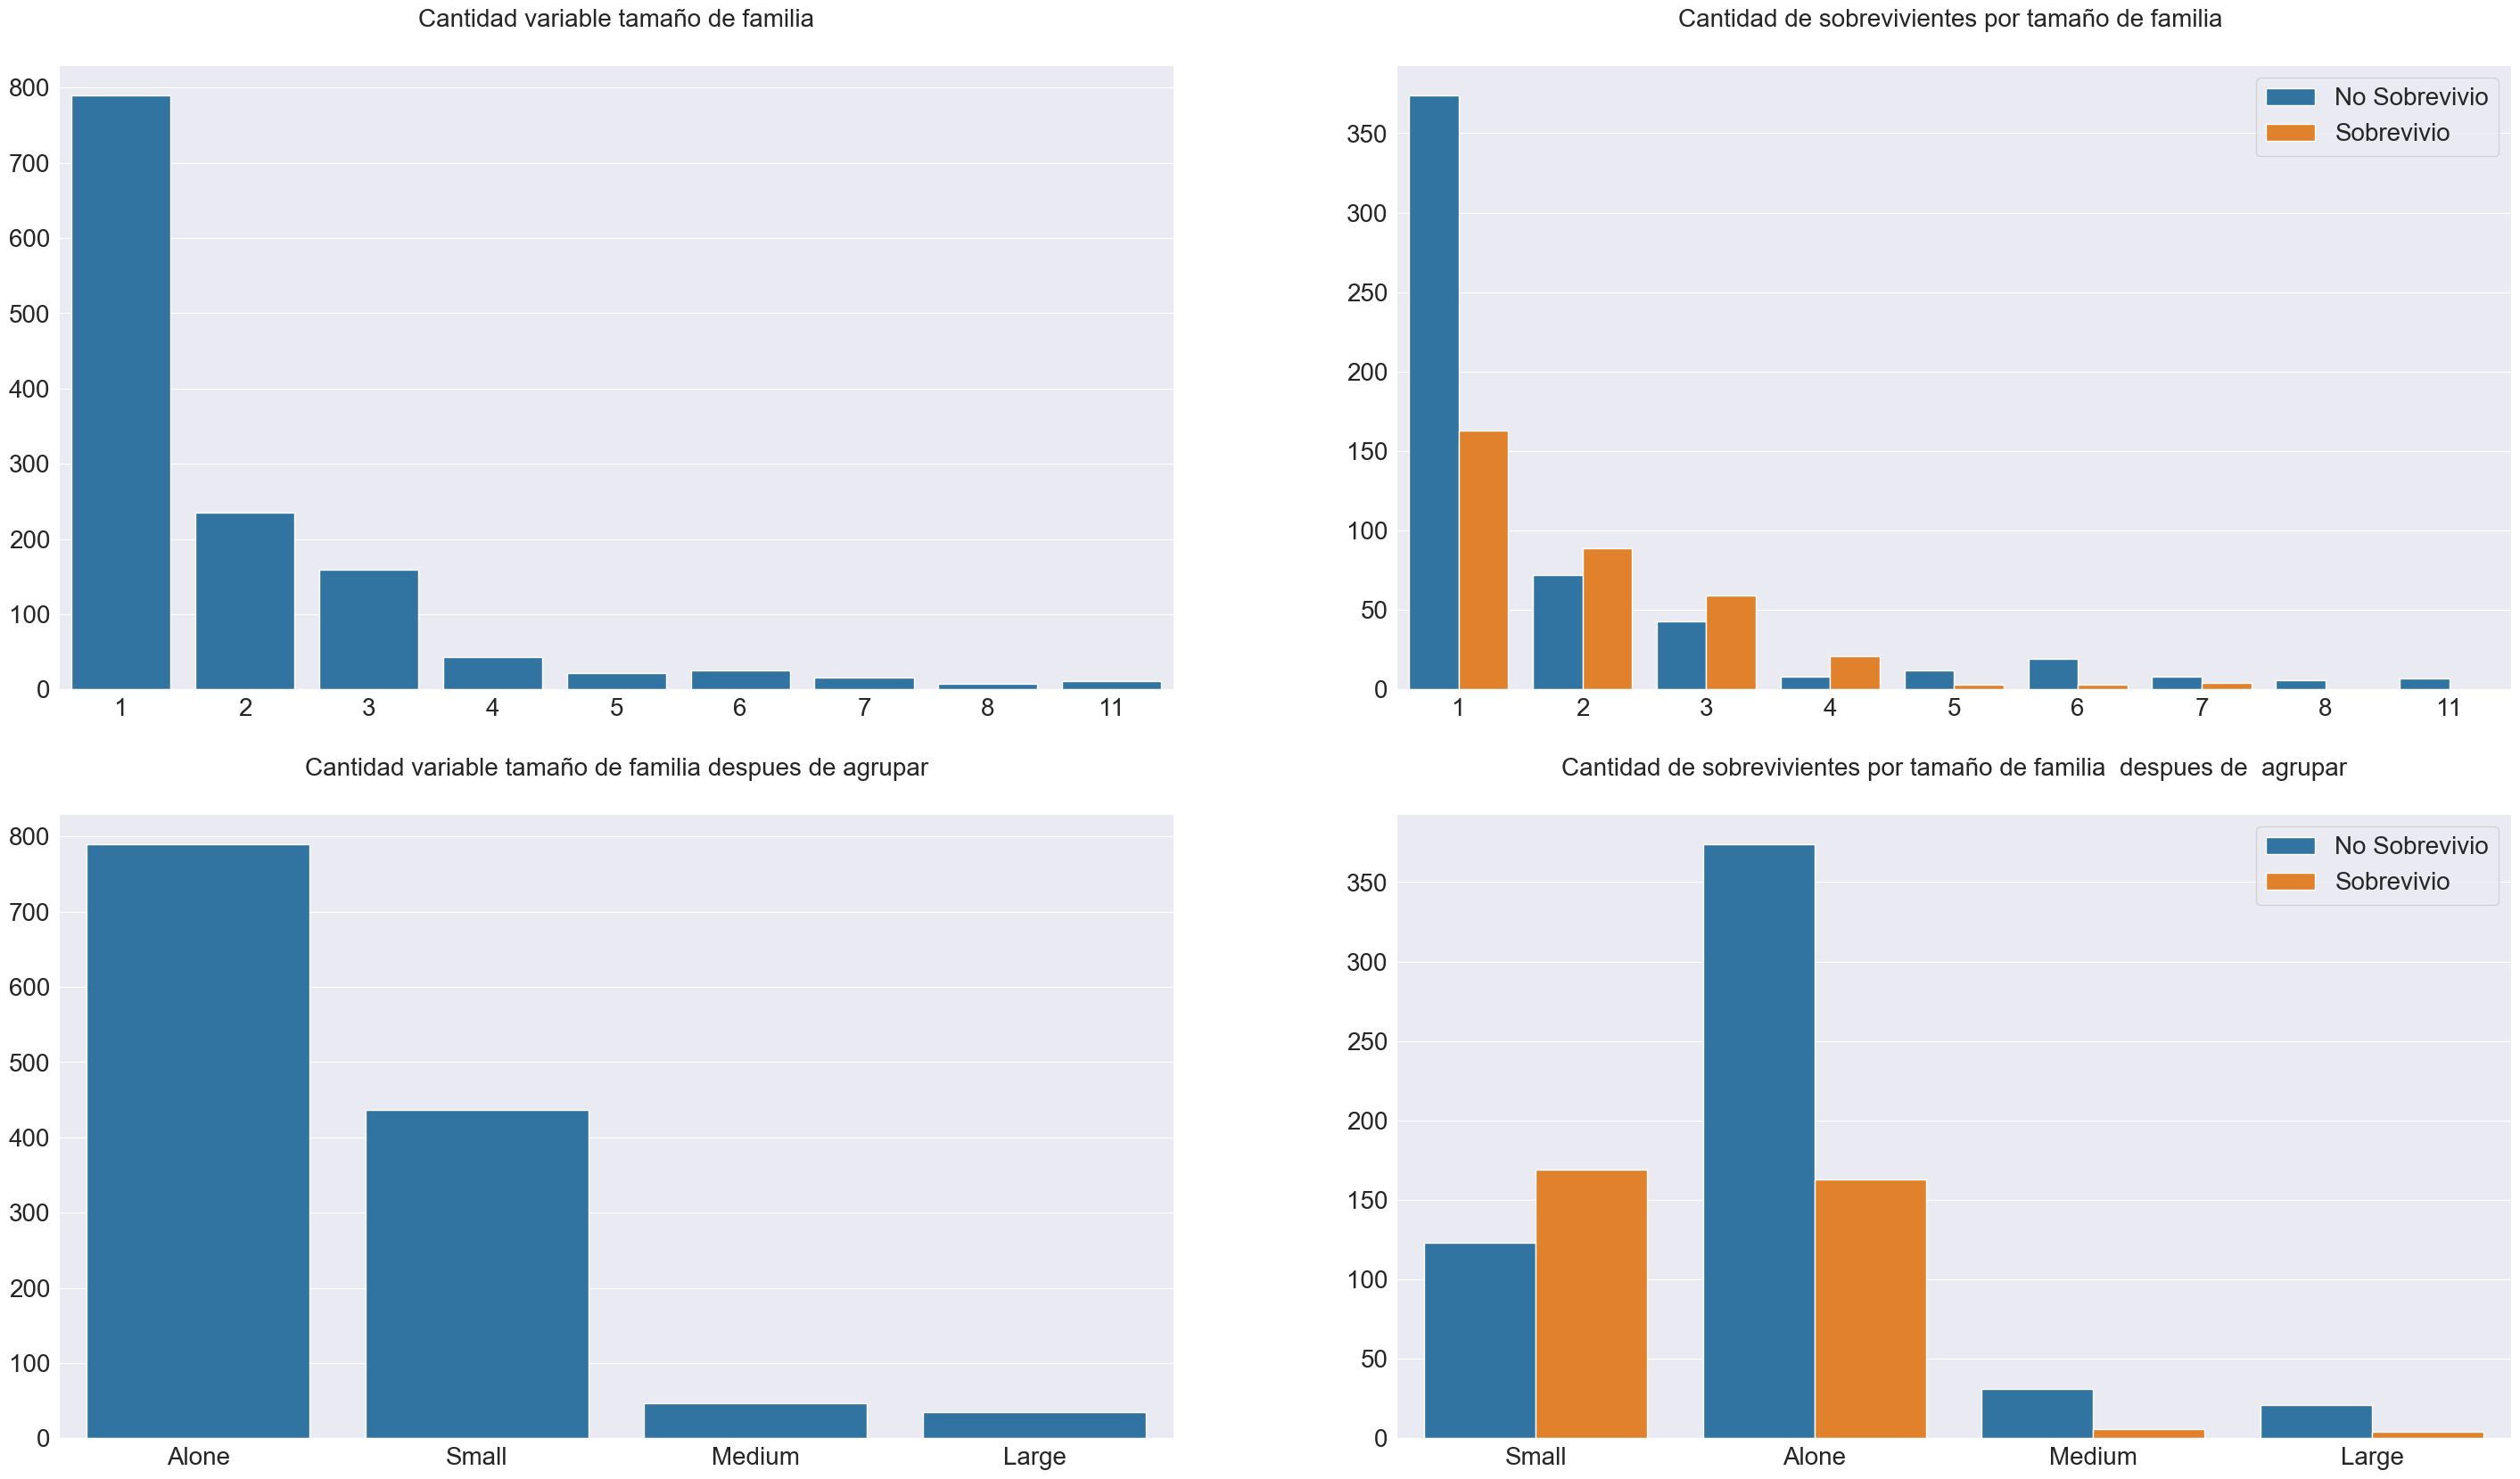

In [89]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df['Family_Size'].value_counts().index, y=df['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df, ax=axs[0][1])

axs[0][0].set_title('Cantidad variable tamaño de familia', size=20, y=1.05)
axs[0][1].set_title('Cantidad de sobrevivientes por tamaño de familia ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df['Family_Size_Grouped'] = df['Family_Size'].map(family_map)

sns.barplot(x=df['Family_Size_Grouped'].value_counts().index, y=df['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df, ax=axs[1][1])

axs[1][0].set_title('Cantidad variable tamaño de familia despues de agrupar', size=20, y=1.05)
axs[1][1].set_title('Cantidad de sobrevivientes por tamaño de familia  despues de  agrupar', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

In [90]:
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

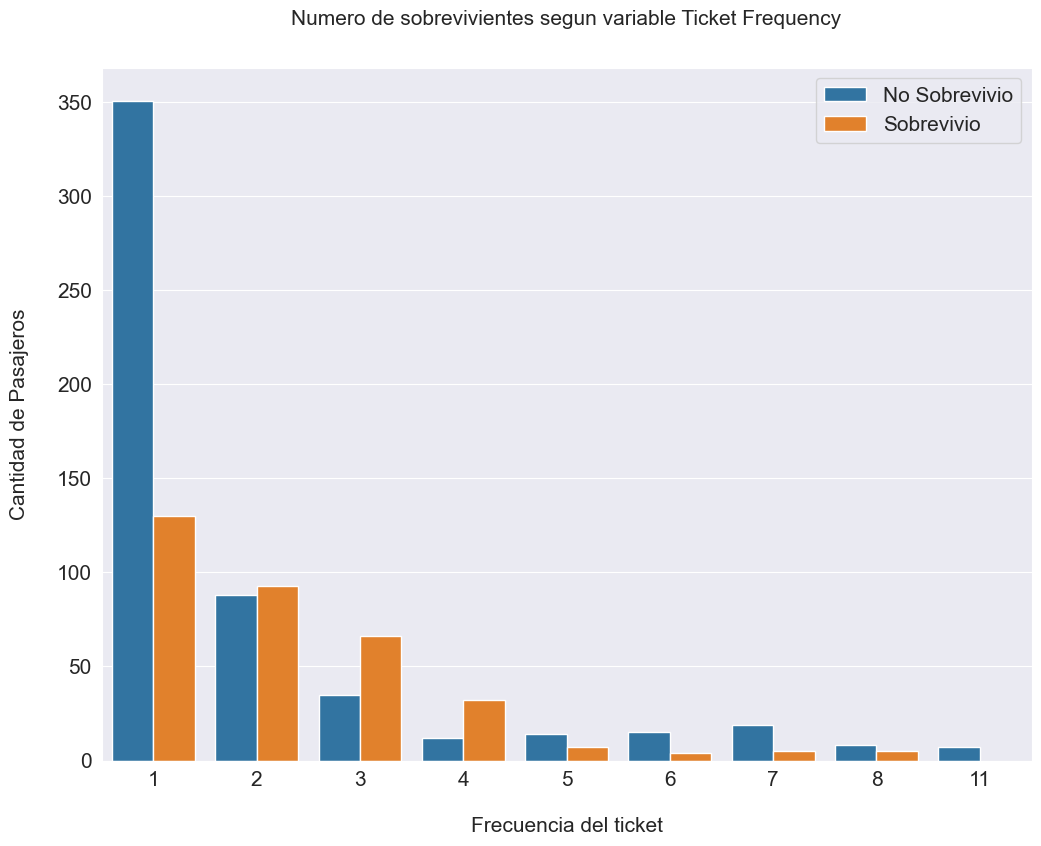

In [91]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df)

plt.xlabel('Frecuencia del ticket', size=15, labelpad=20)
plt.ylabel('Cantidad de Pasajeros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['No Sobrevivio', 'Sobrevivio'], loc='upper right', prop={'size': 15})
plt.title('Numero de sobrevivientes segun variable {}'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

**Title & Is Married**

In [92]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

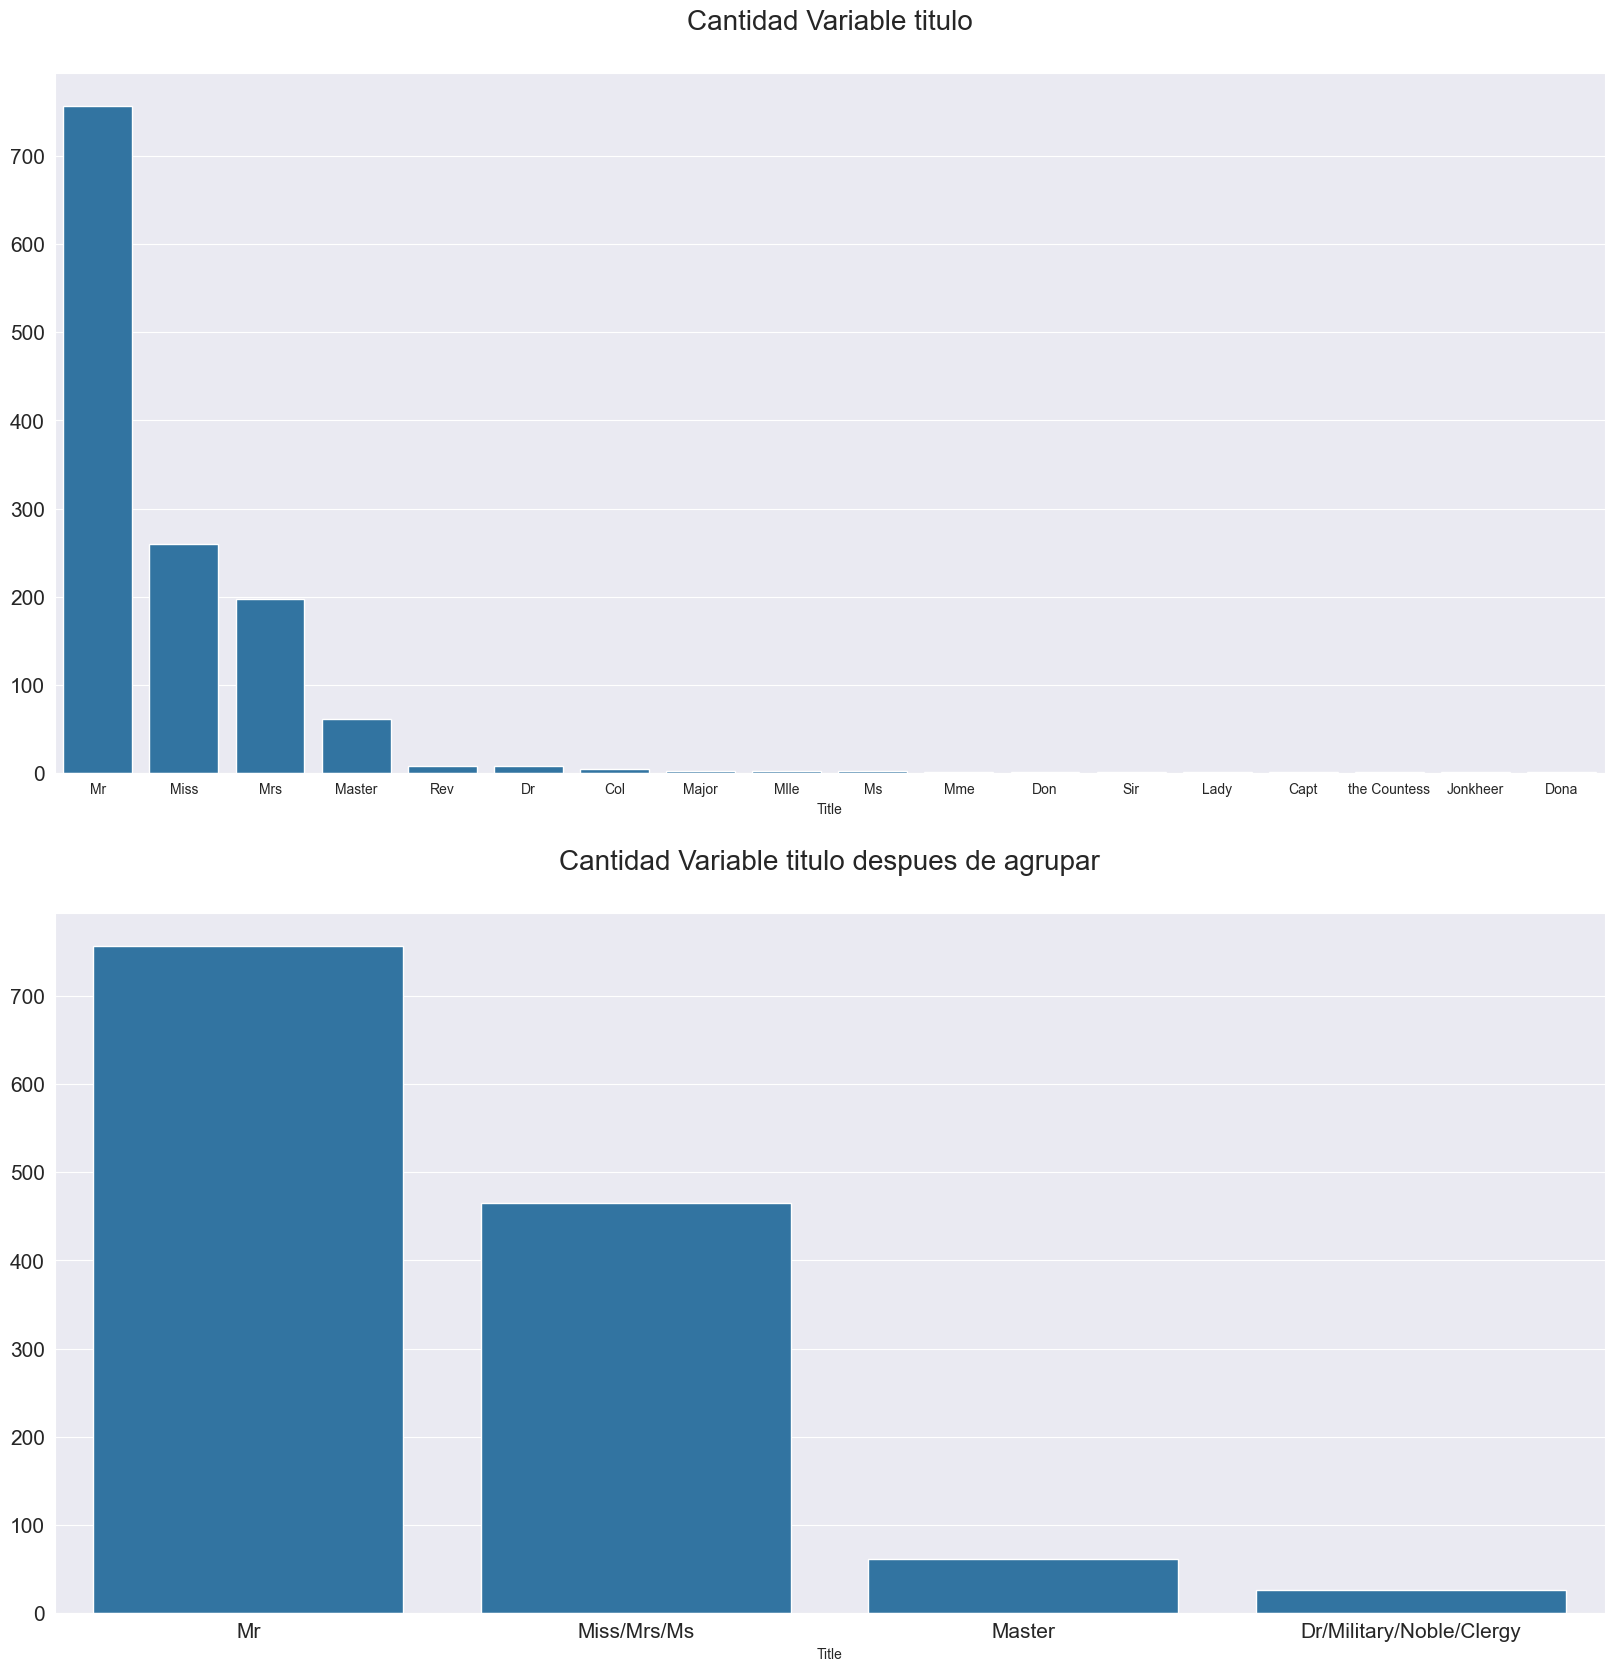

In [93]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df['Title'].value_counts().index, y=df['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Cantidad Variable titulo', size=20, y=1.05)

df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df['Title'].value_counts().index, y=df['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Cantidad Variable titulo despues de agrupar', size=20, y=1.05)

plt.show()

**Target Encoding**

In [94]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df['Family'] = extract_surname(df['Name'])
df_train = df.loc[:890]
df_test = df.loc[891:]
dfs = [df_train, df_test]

In [499]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

**Feature transformation**

Label Encoding Non-Numerical Features

In [500]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

One-Hot Encoding the Categorical Features


In [97]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)